아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [1]:
from preamble import *

## 지도 학습
### 분류와 회귀

### 일반화, 과대적합, 과소적합

##### 모델 복잡도와 데이터셋 사이즈의 관계

### 지도 학습 알고리즘

X.shape: (26, 2)


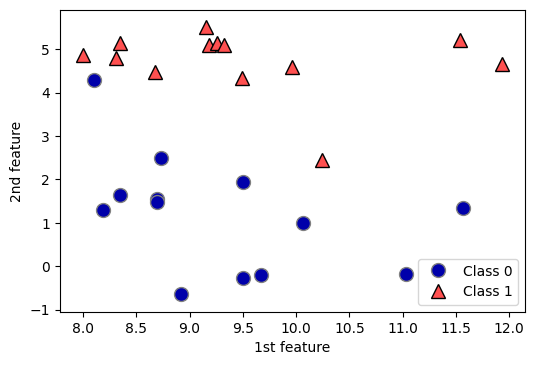

In [2]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

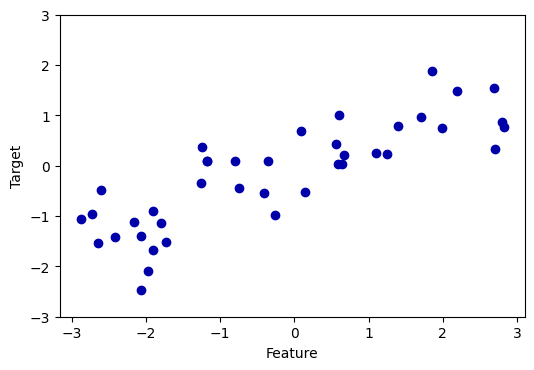

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show() # 책에는 없음

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


/home/work/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### k-최근접 이웃
#### k-최근접 이웃 분류

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53

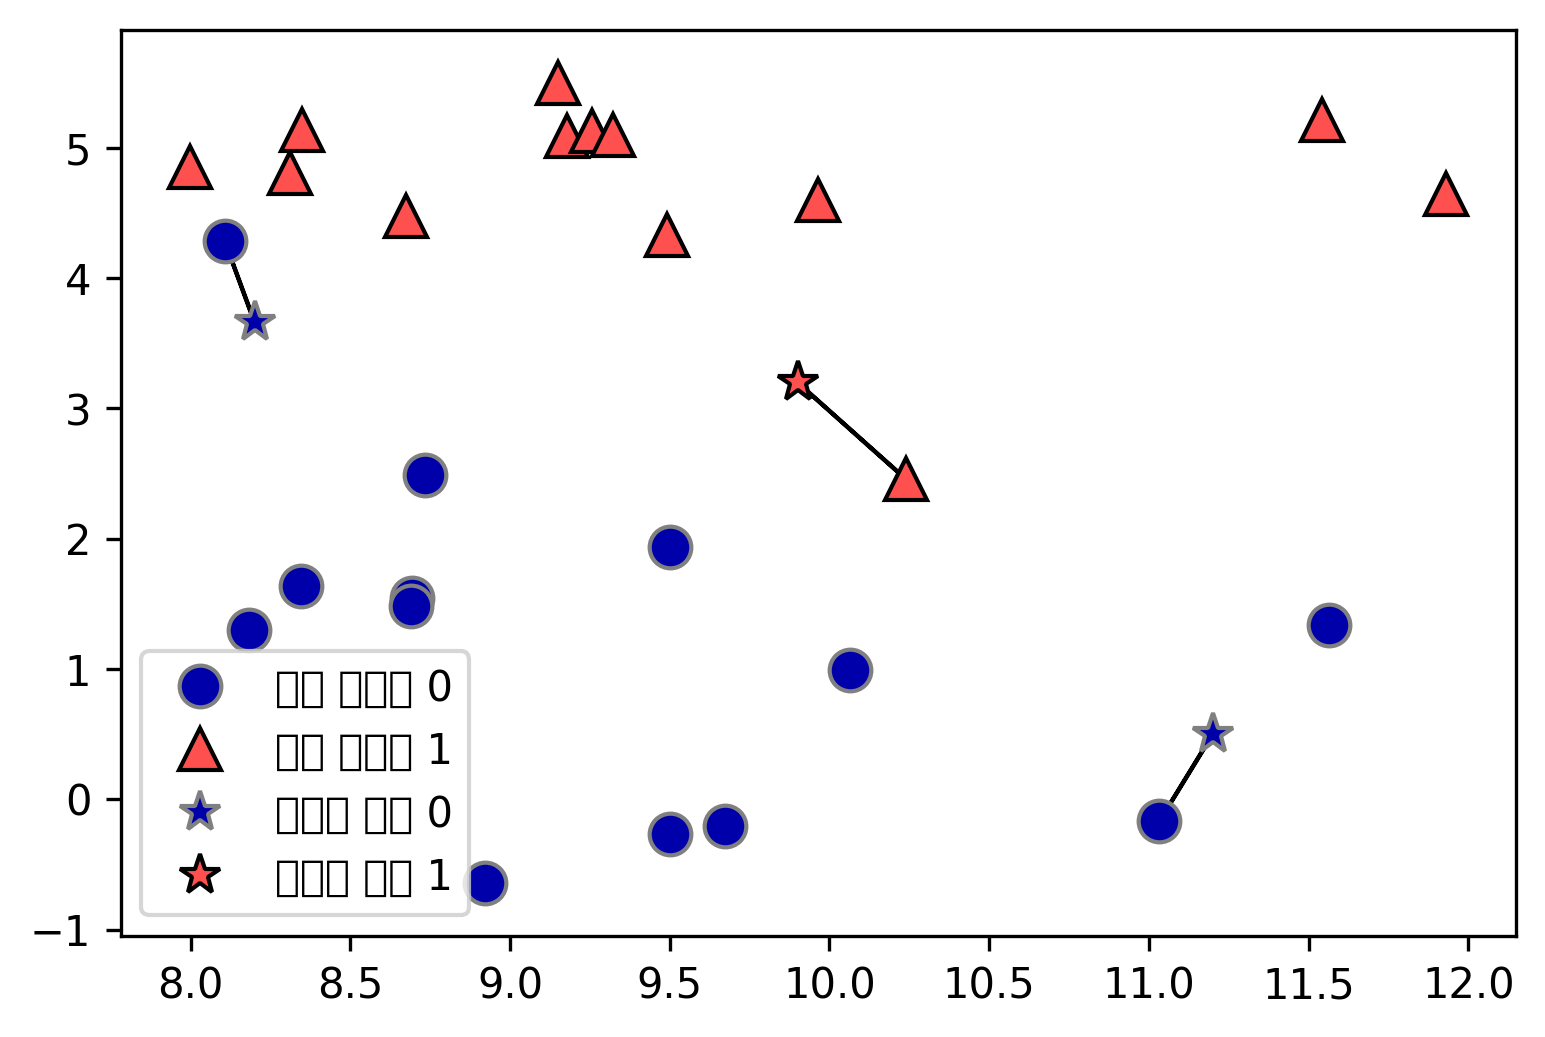

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53

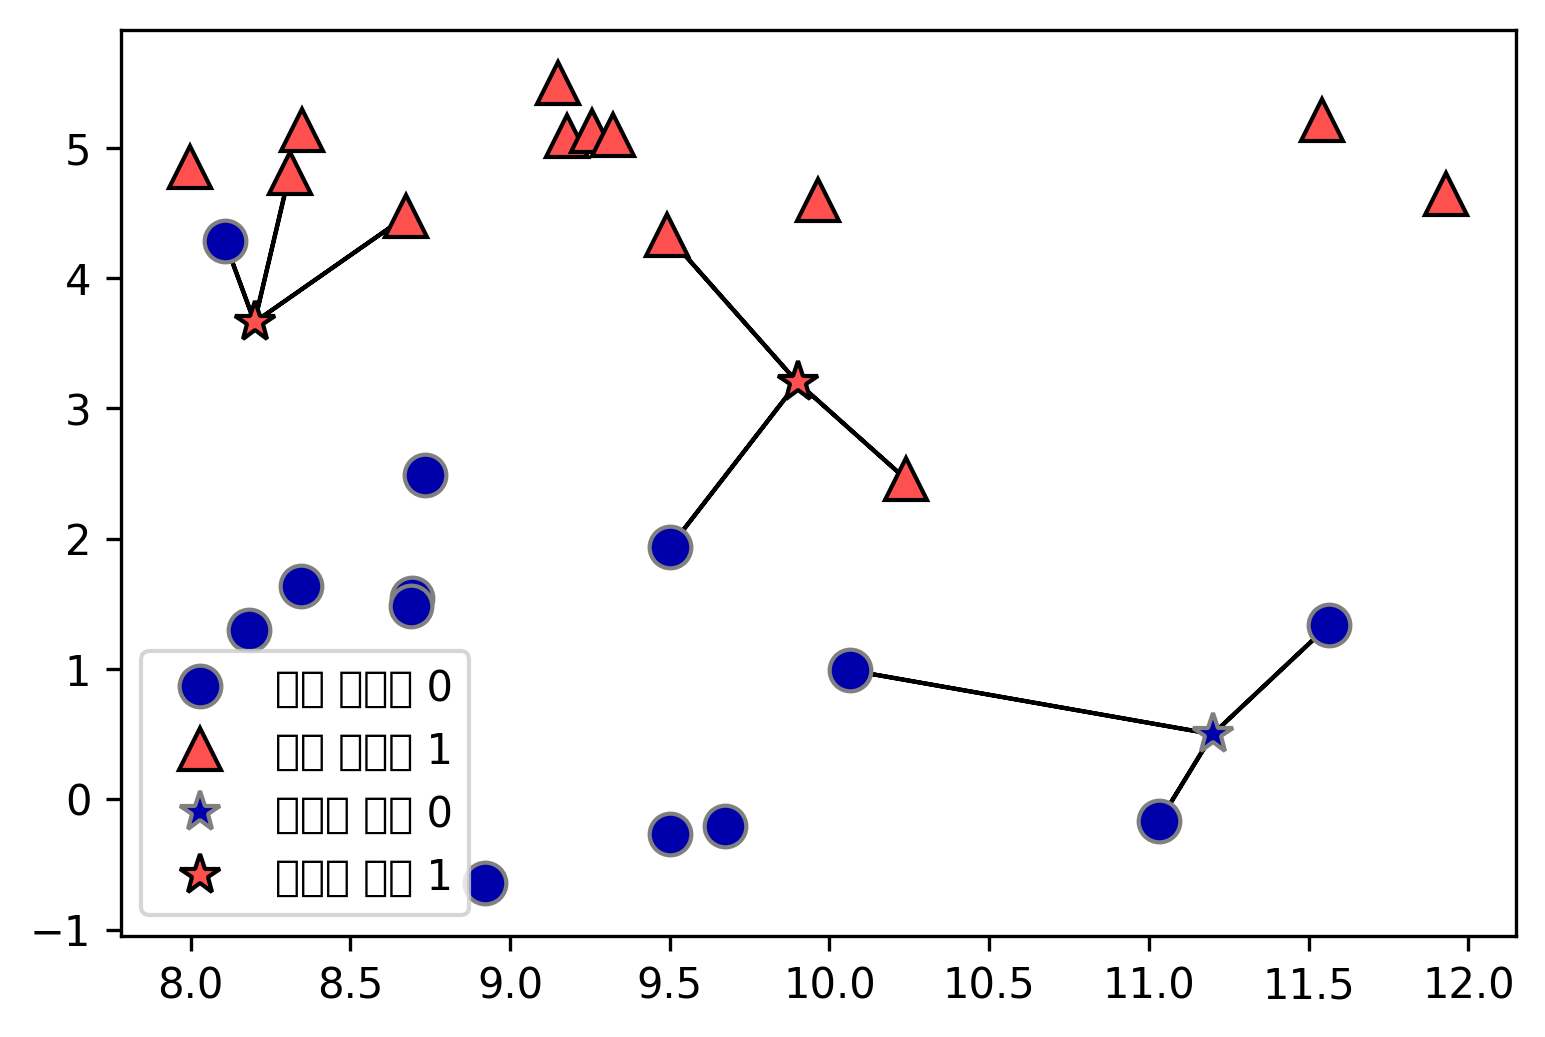

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


#### KNeighborsClassifier 분석

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 4945

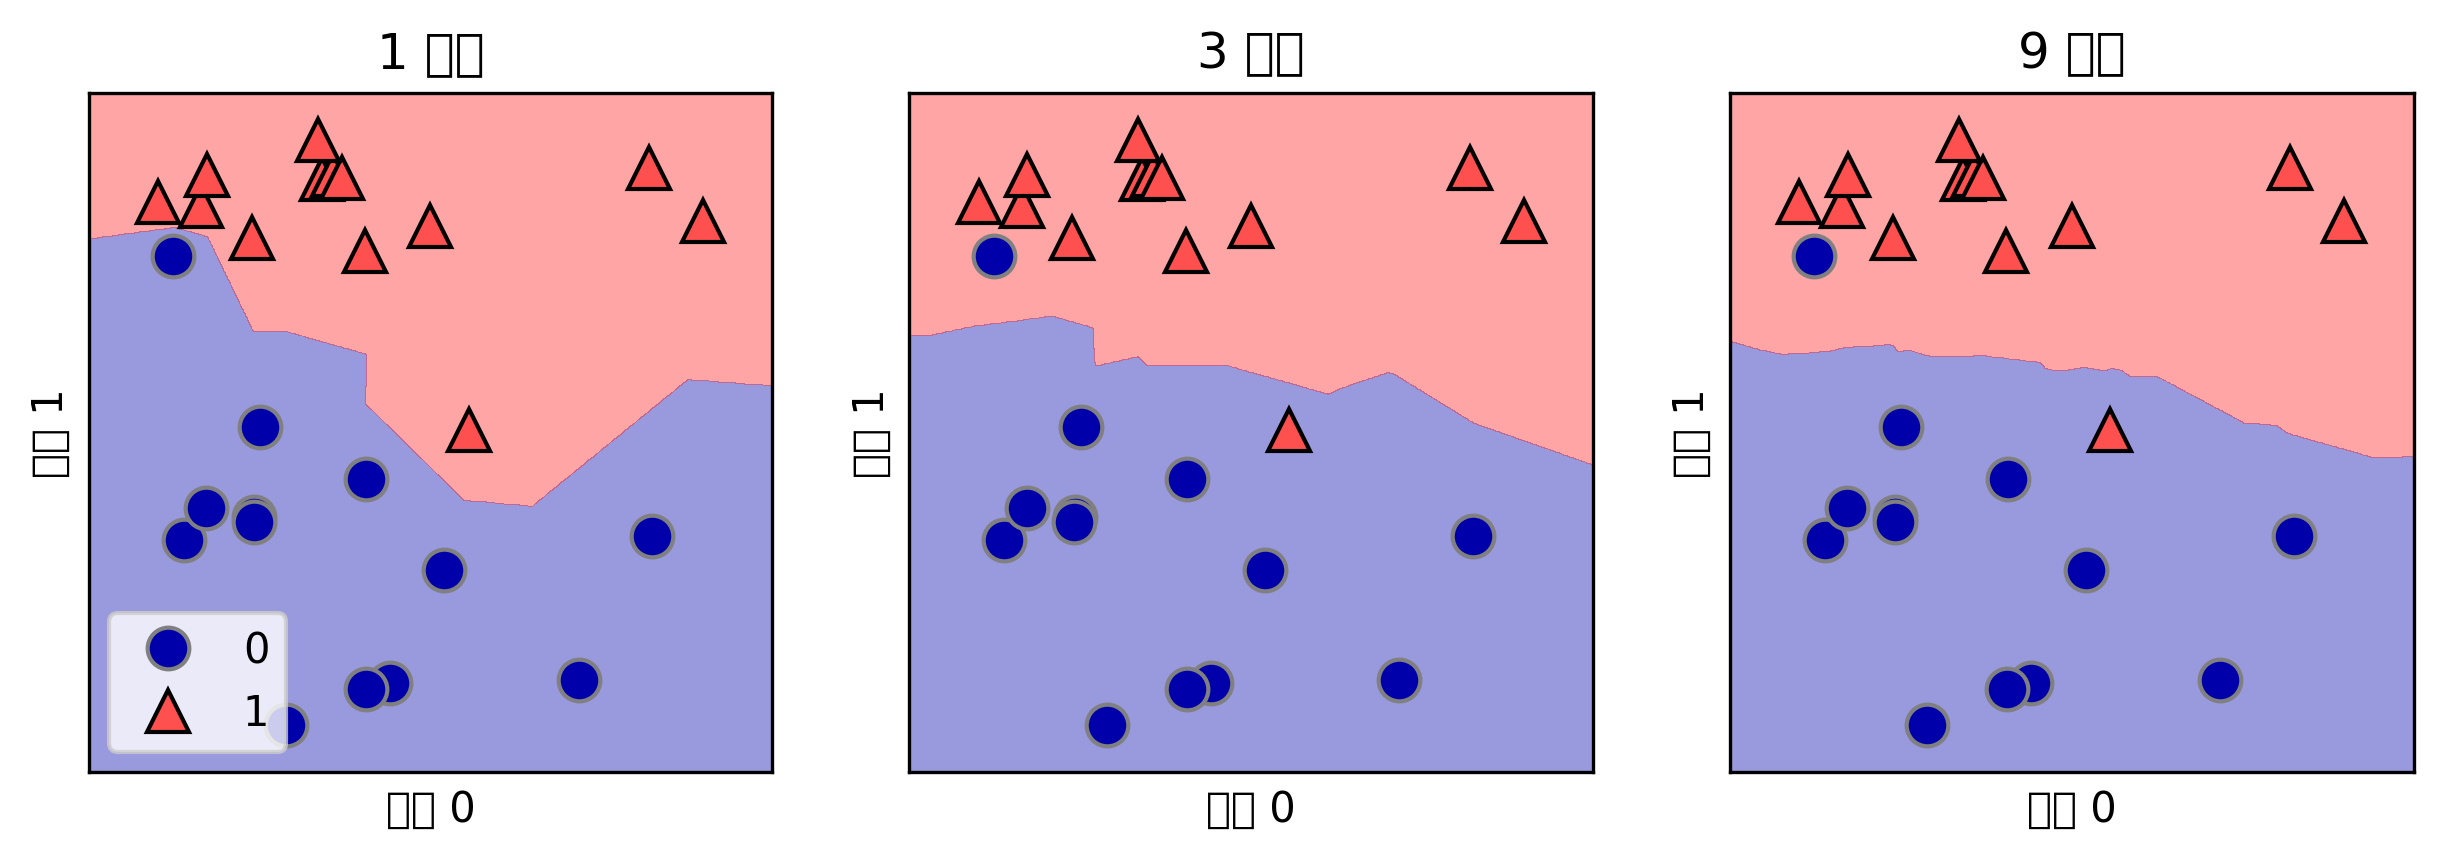

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show() # 책에는 없음

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53

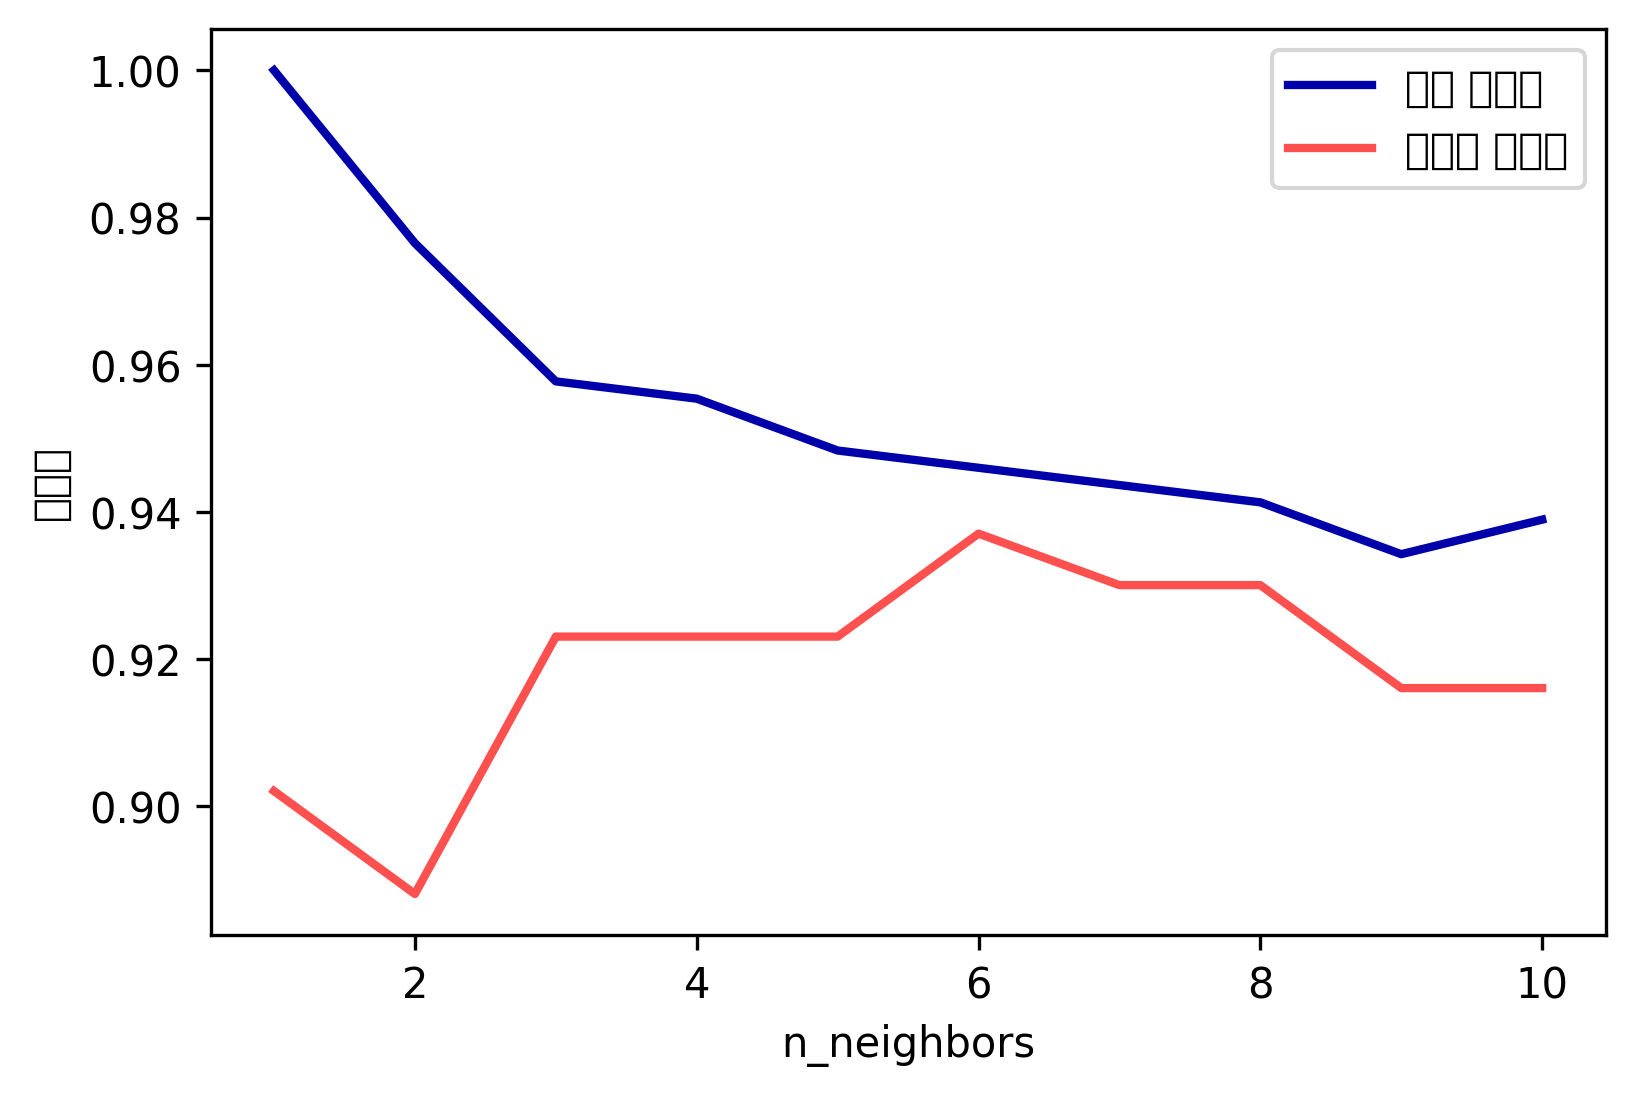

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() # 책에는 없음

#### k-Neighbors Regression

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47

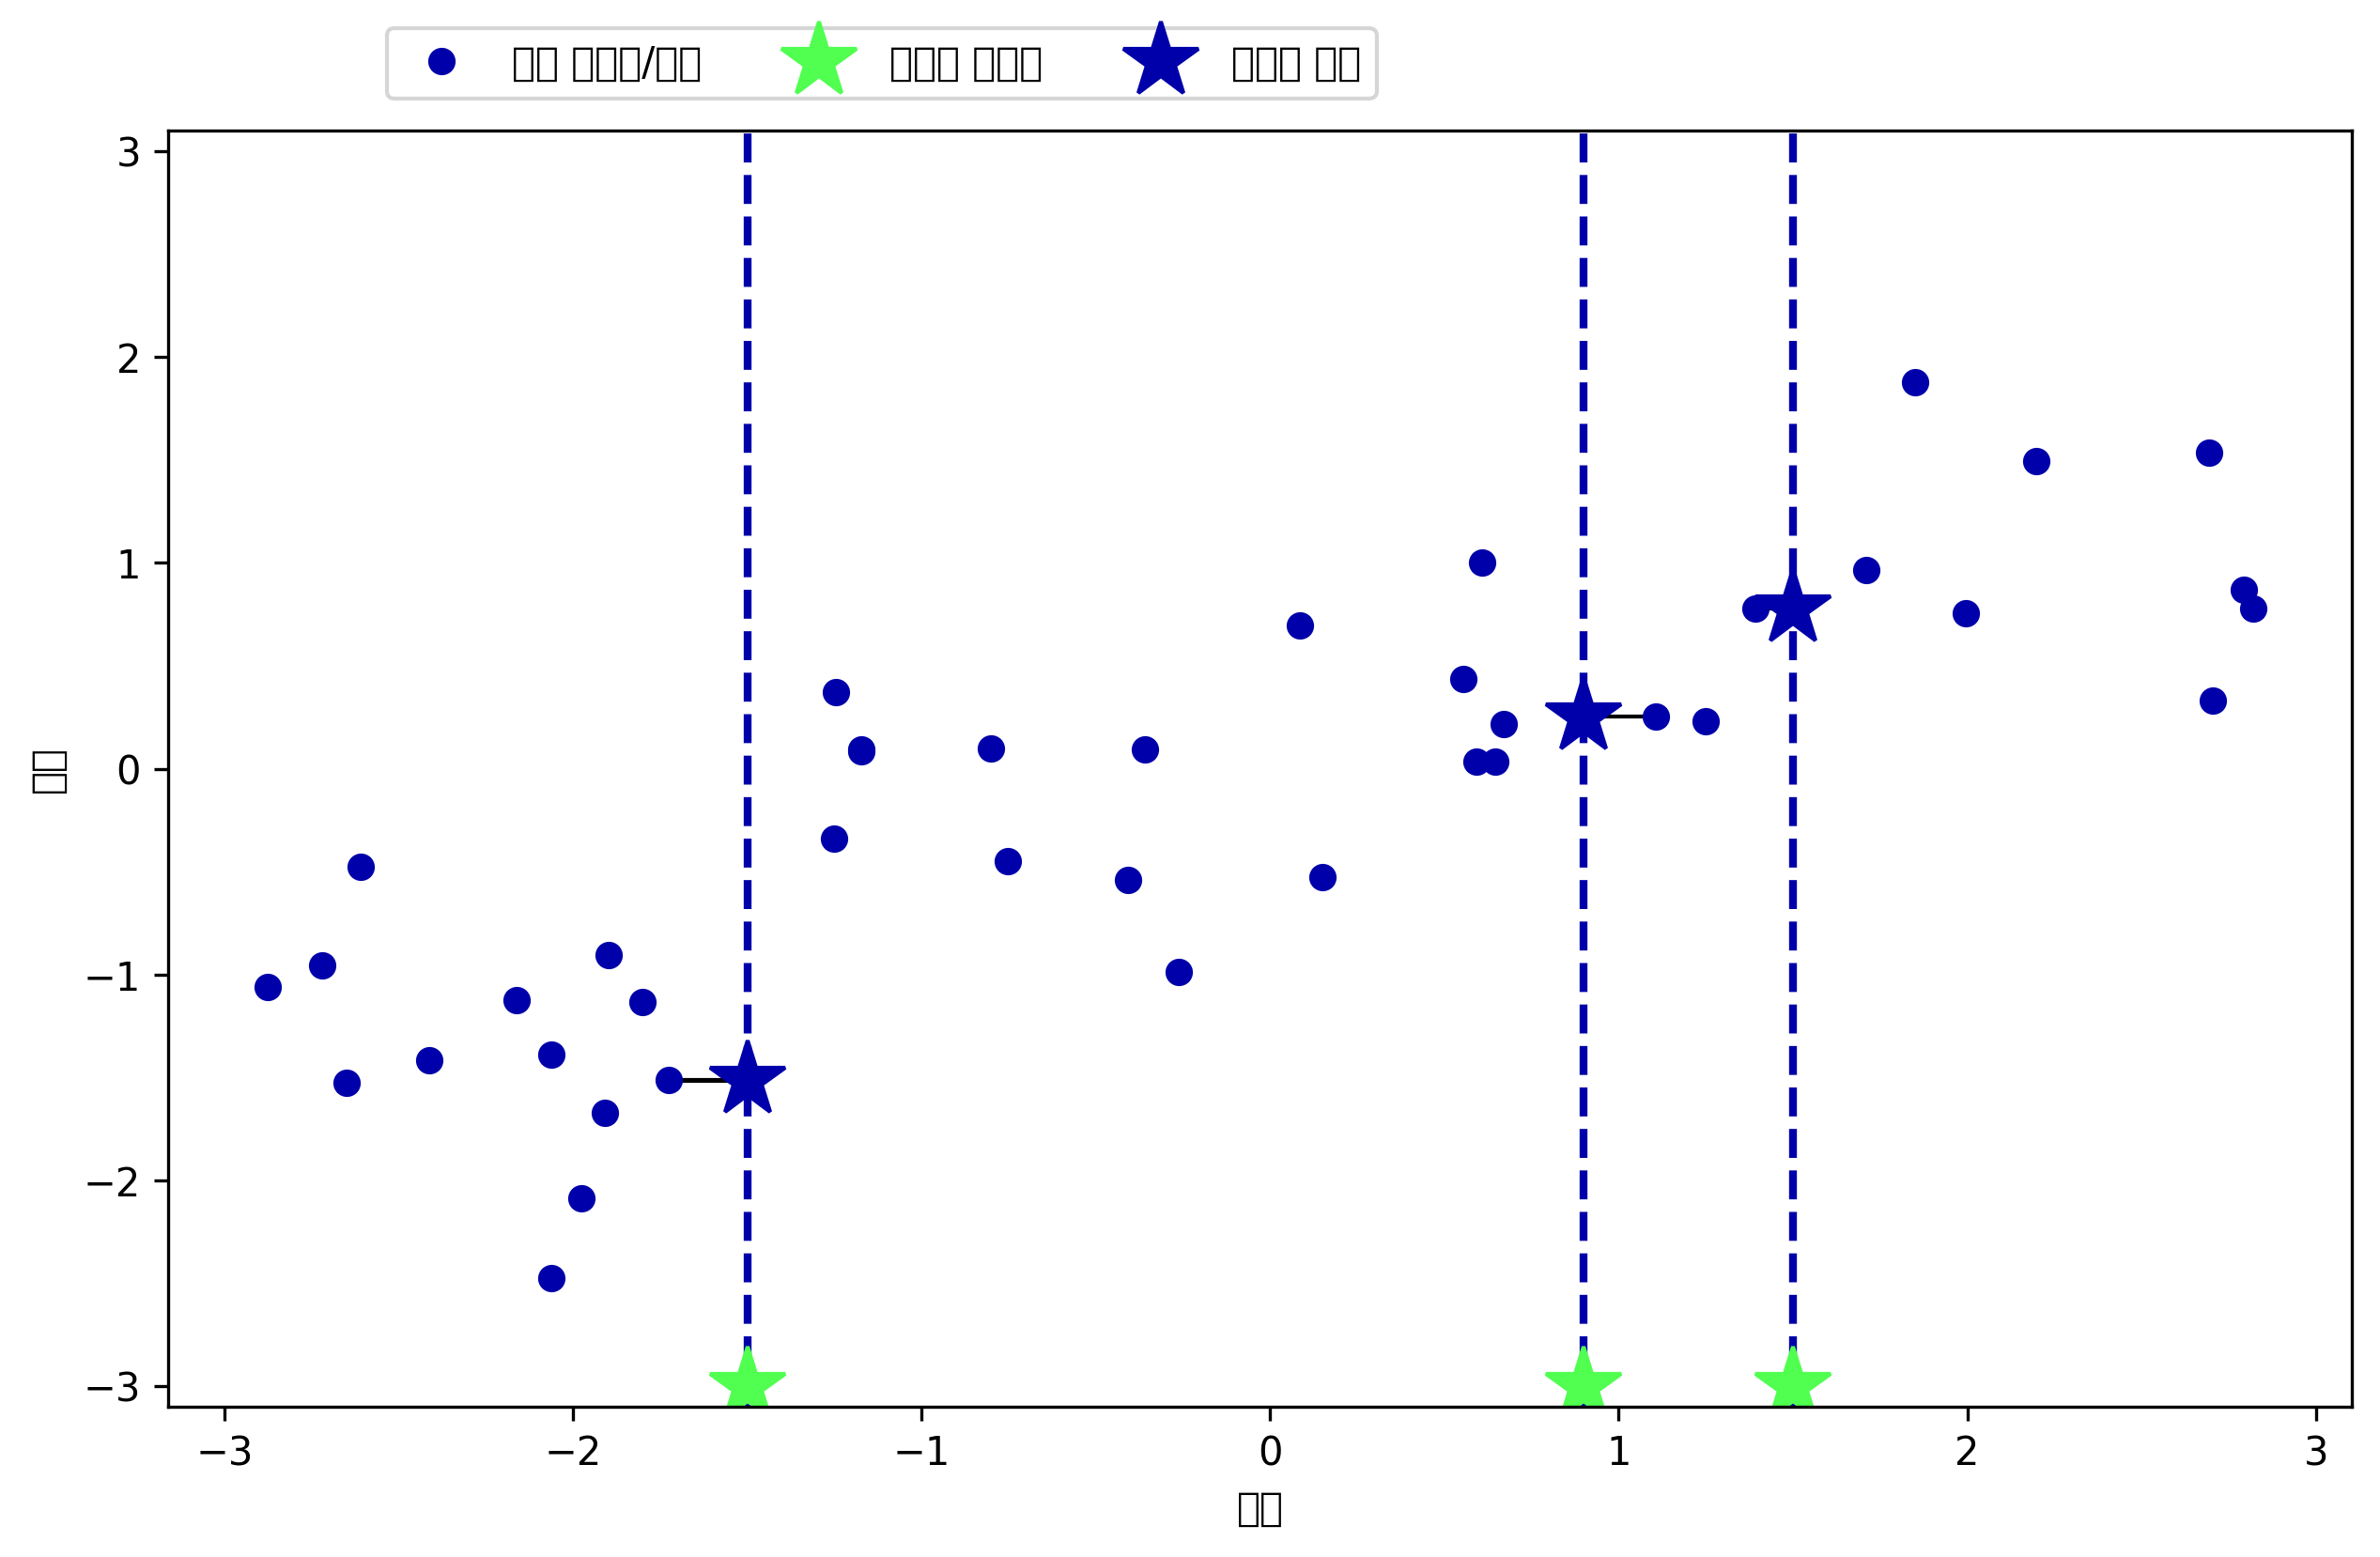

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47

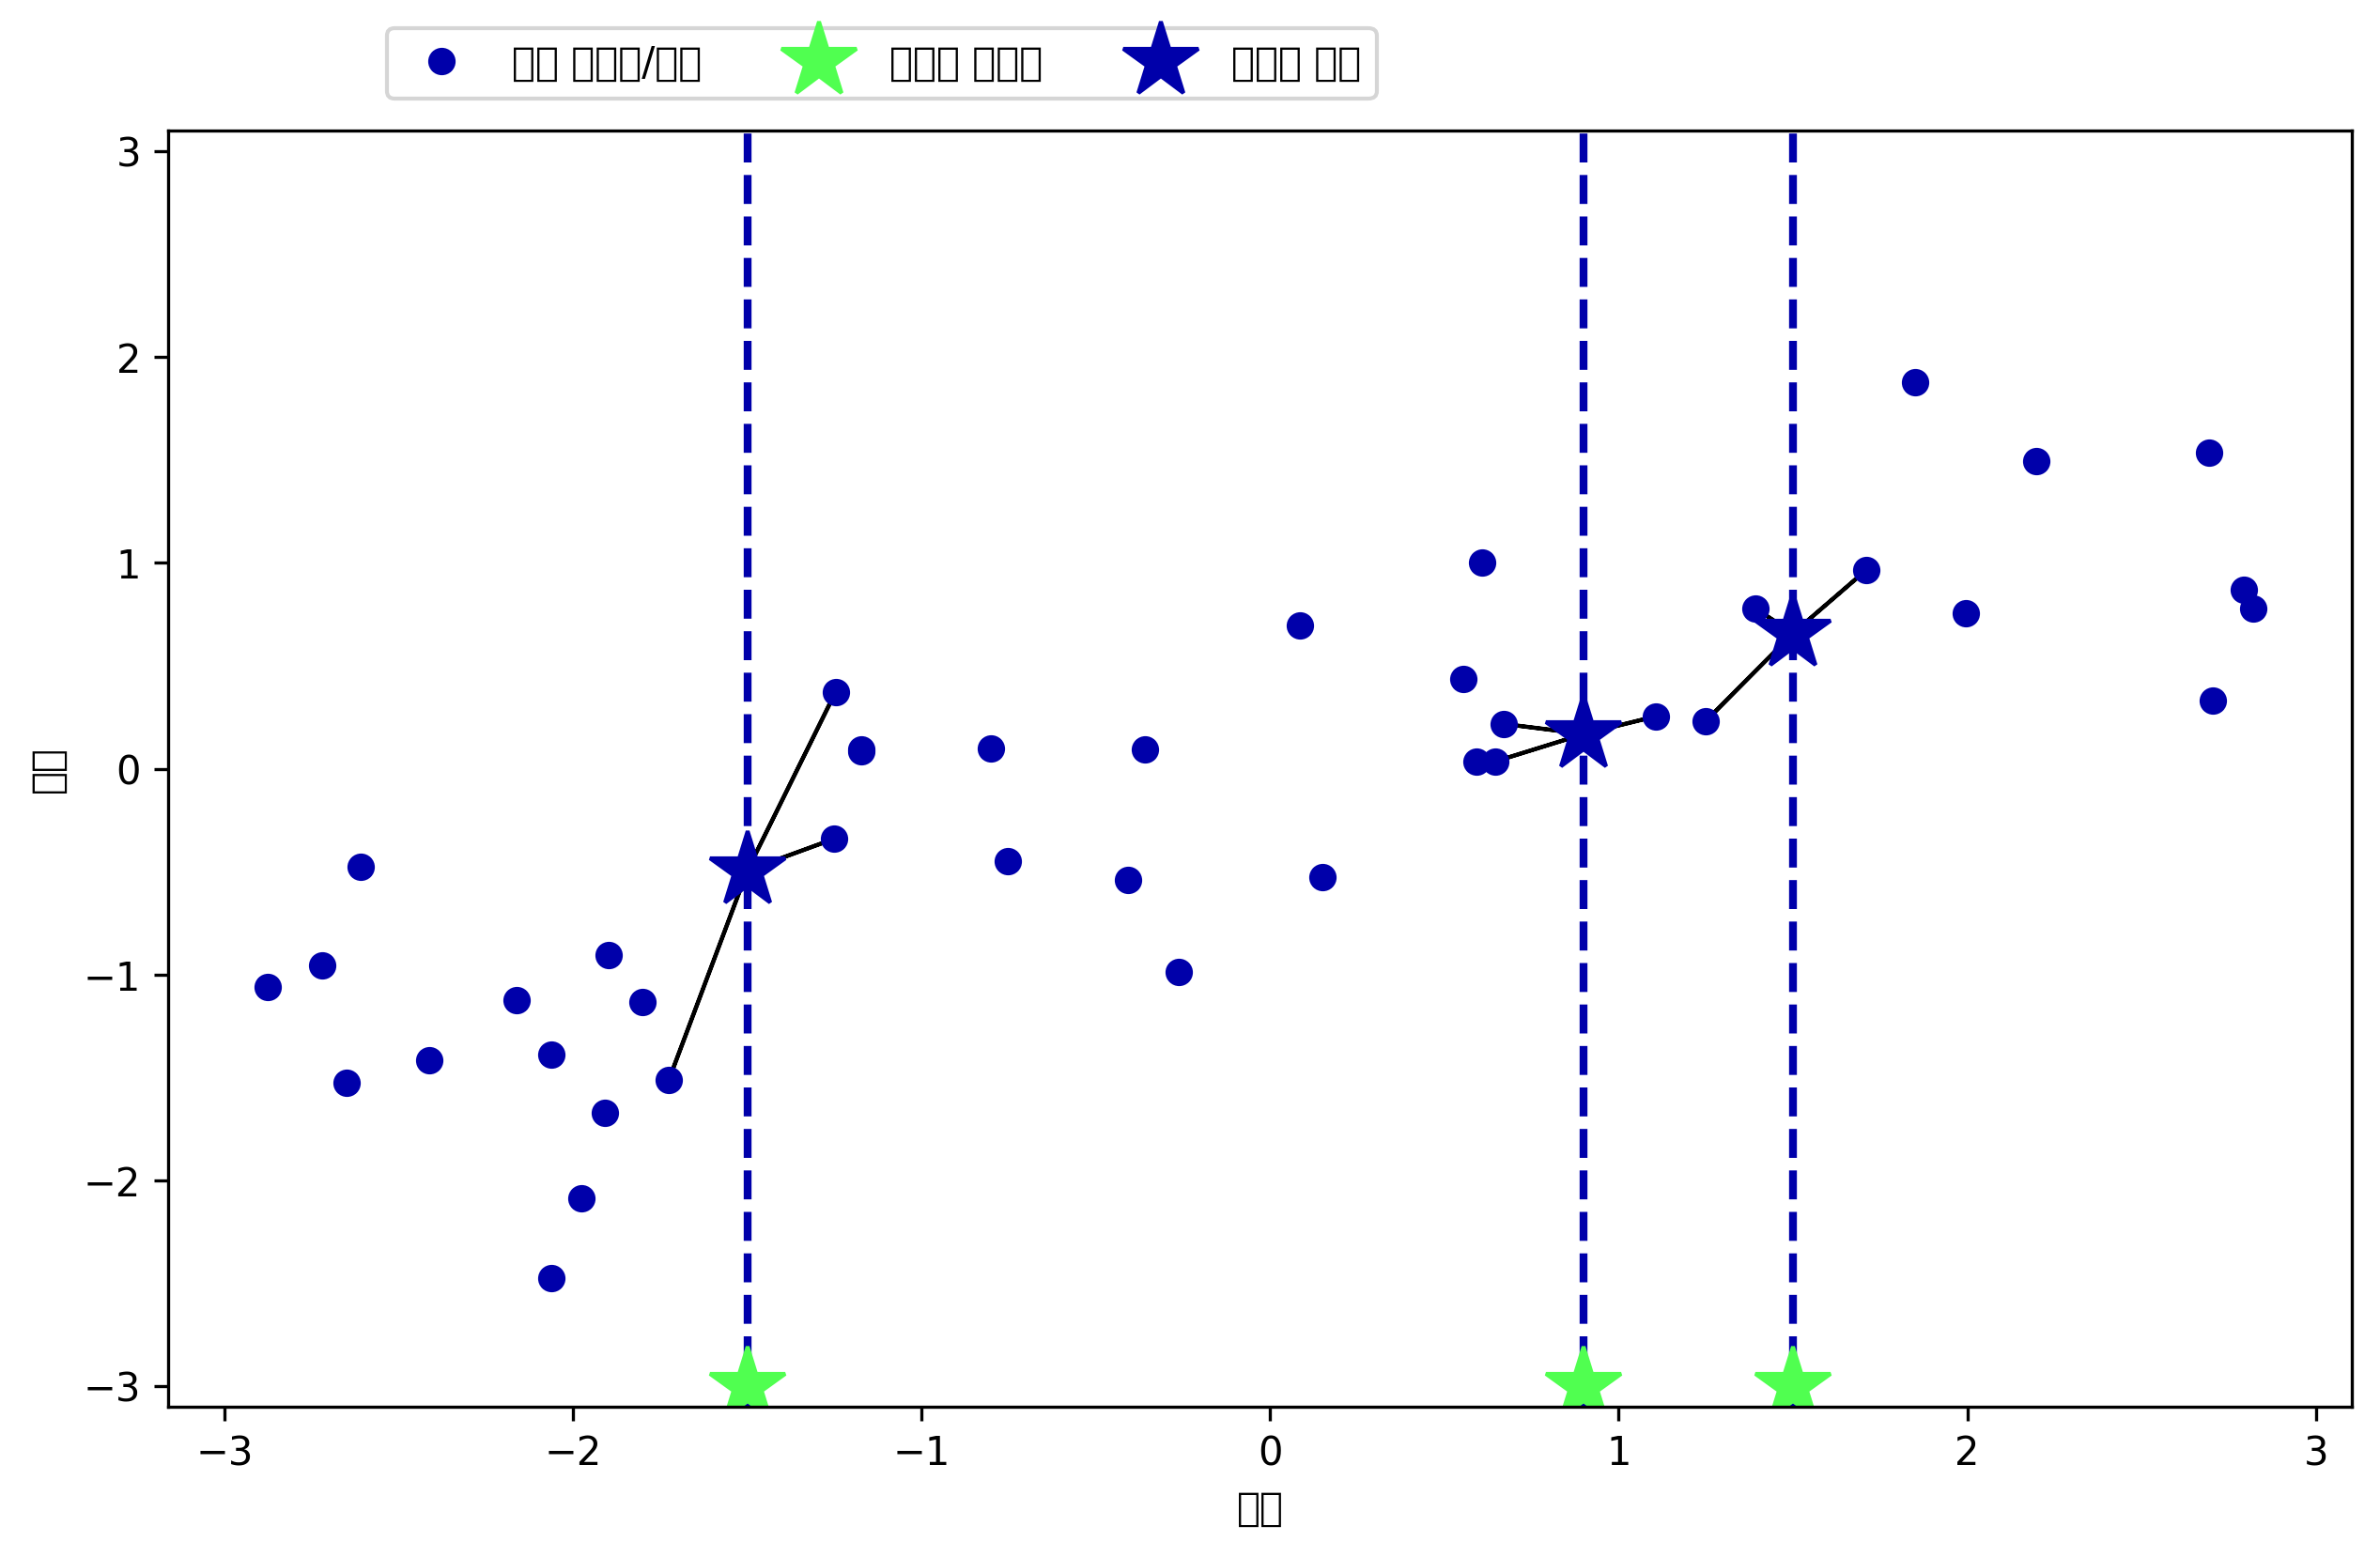

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [23]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49

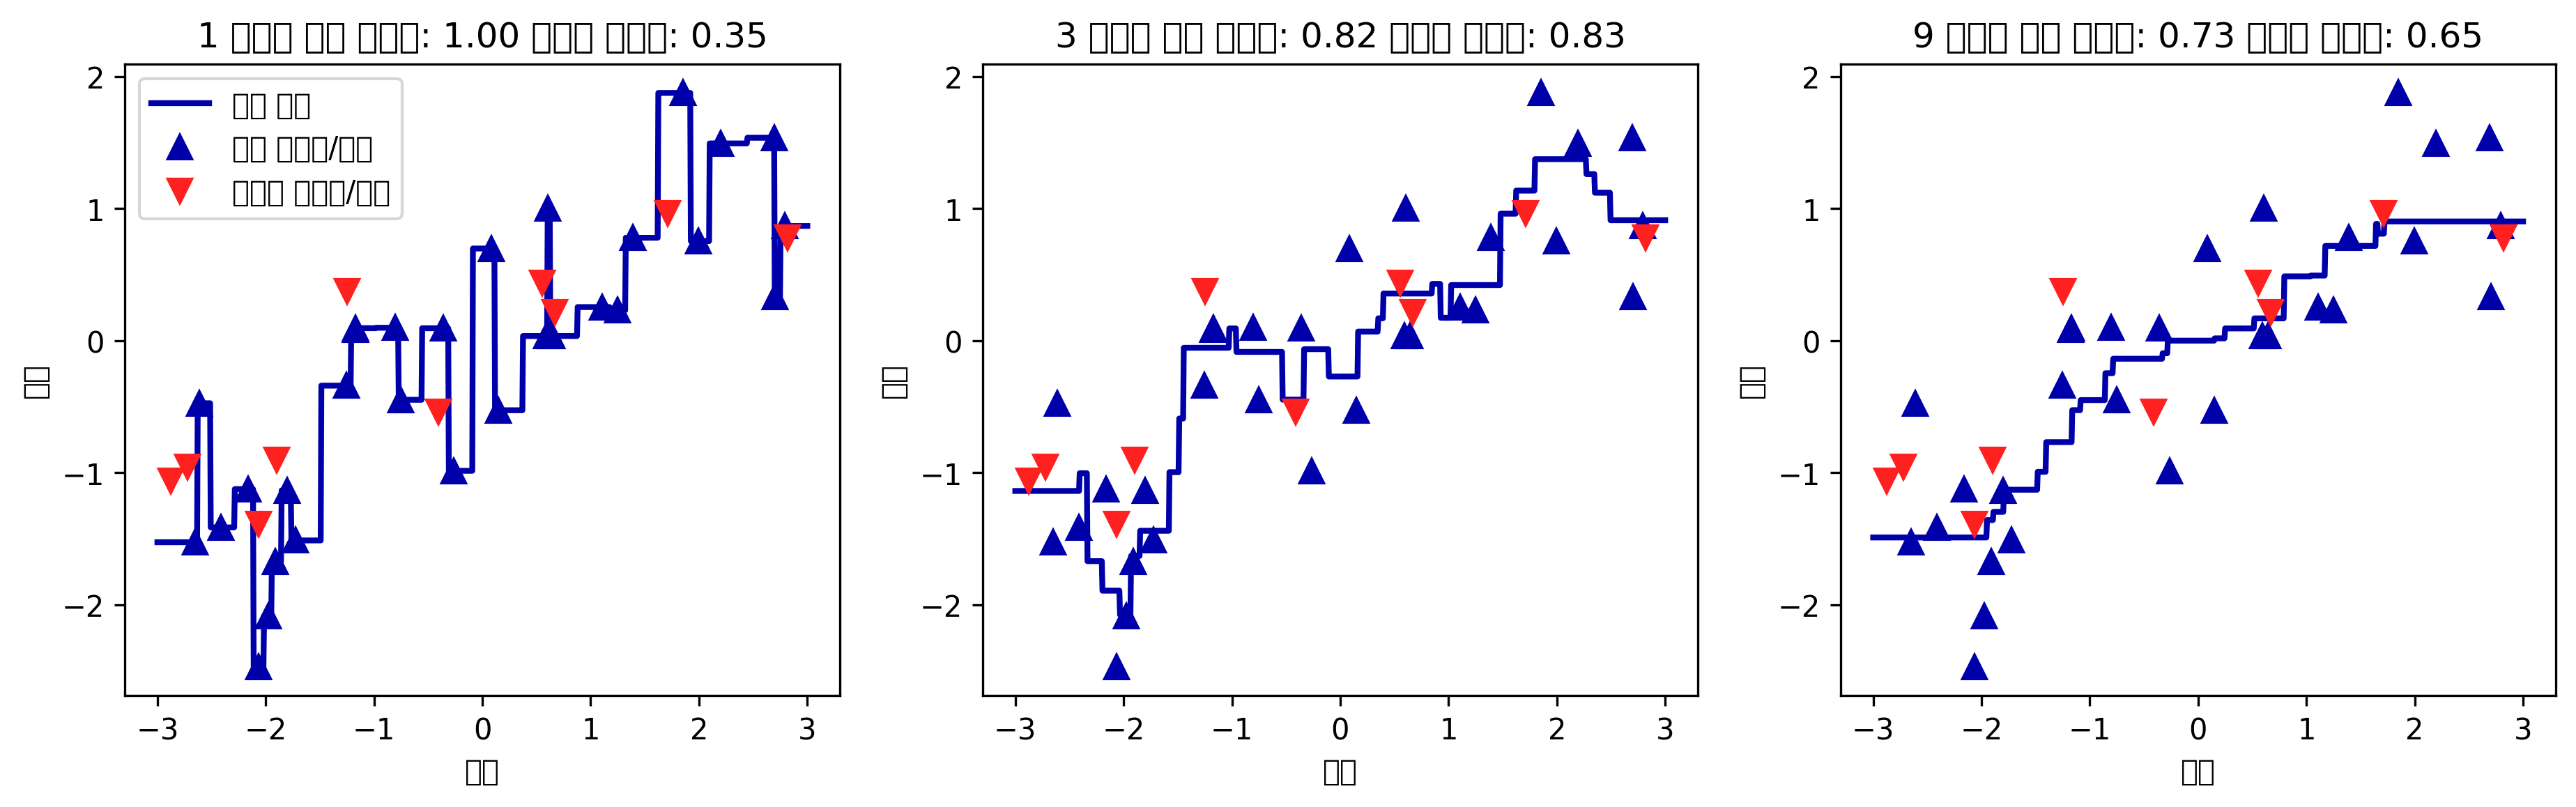

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show() # 책에는 없음

#### 장단점과 파라메타

### 선형 모델
#### 선형 회귀 모델
\begin{align*}
\end{align*}

w[0]: 0.393906  b: -0.031804


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51

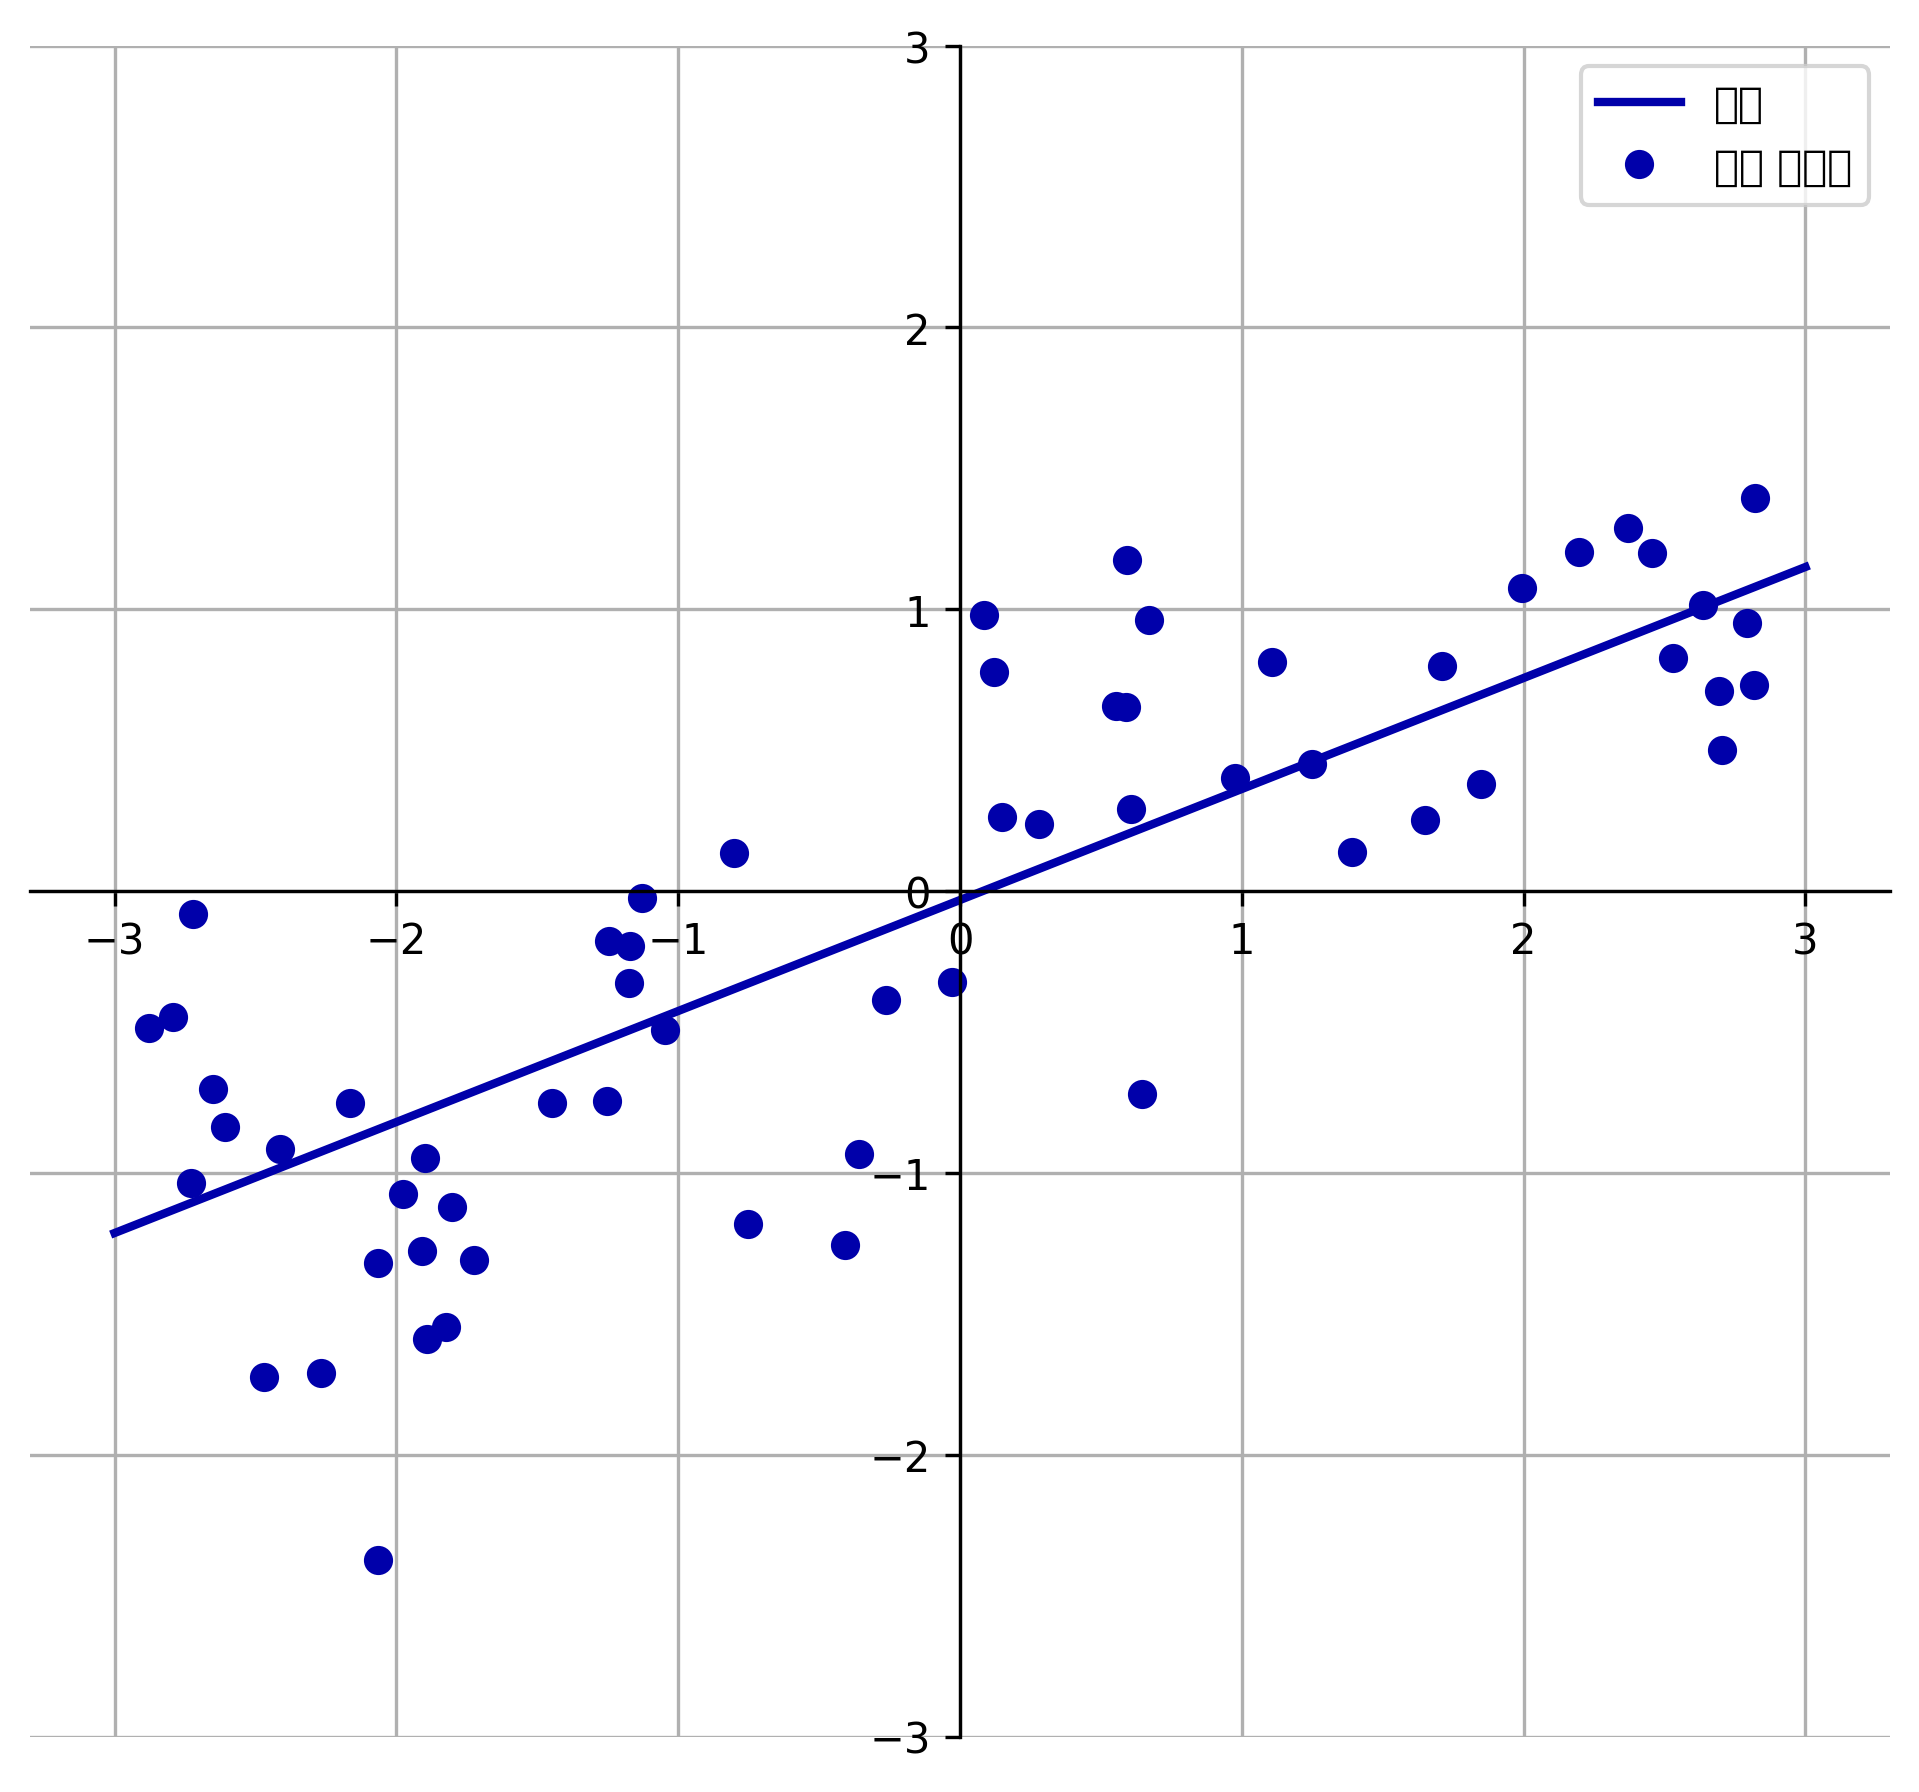

In [25]:
mglearn.plots.plot_linear_regression_wave()

#### 선형회귀(최소제곱법)

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [28]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/home/work/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 릿지 회귀

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

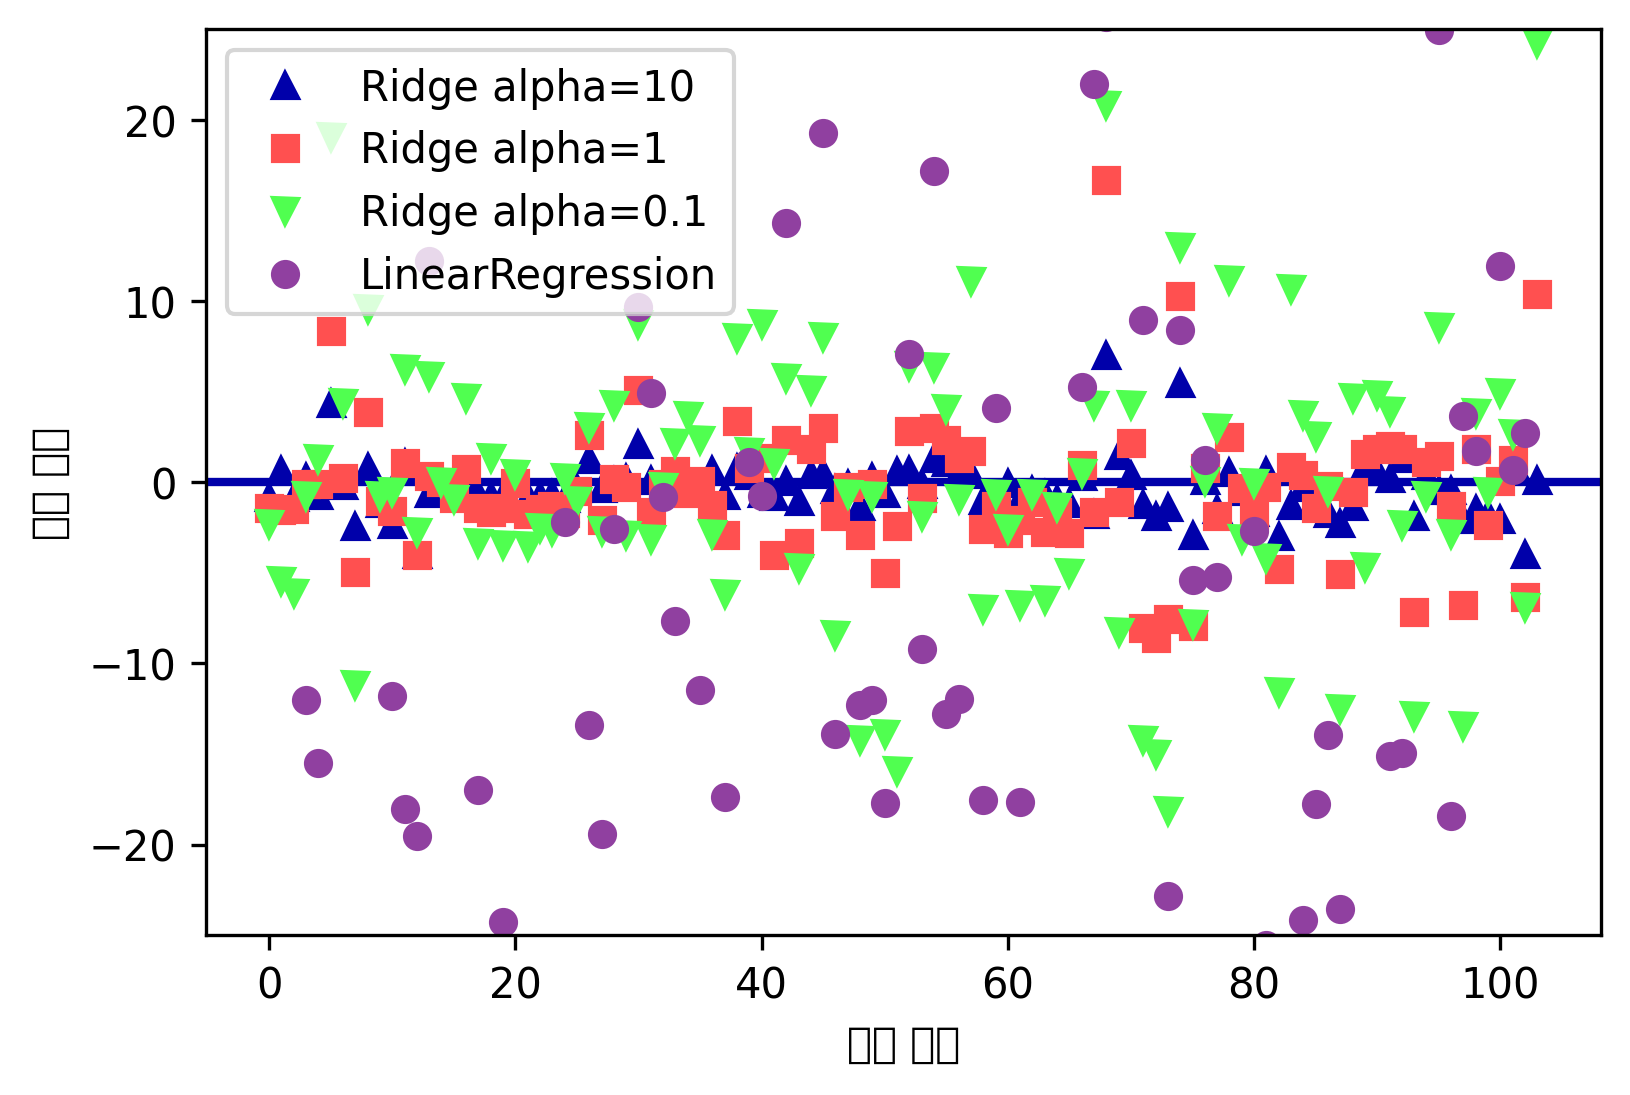

In [34]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() # 책에는 없음

/home/work/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

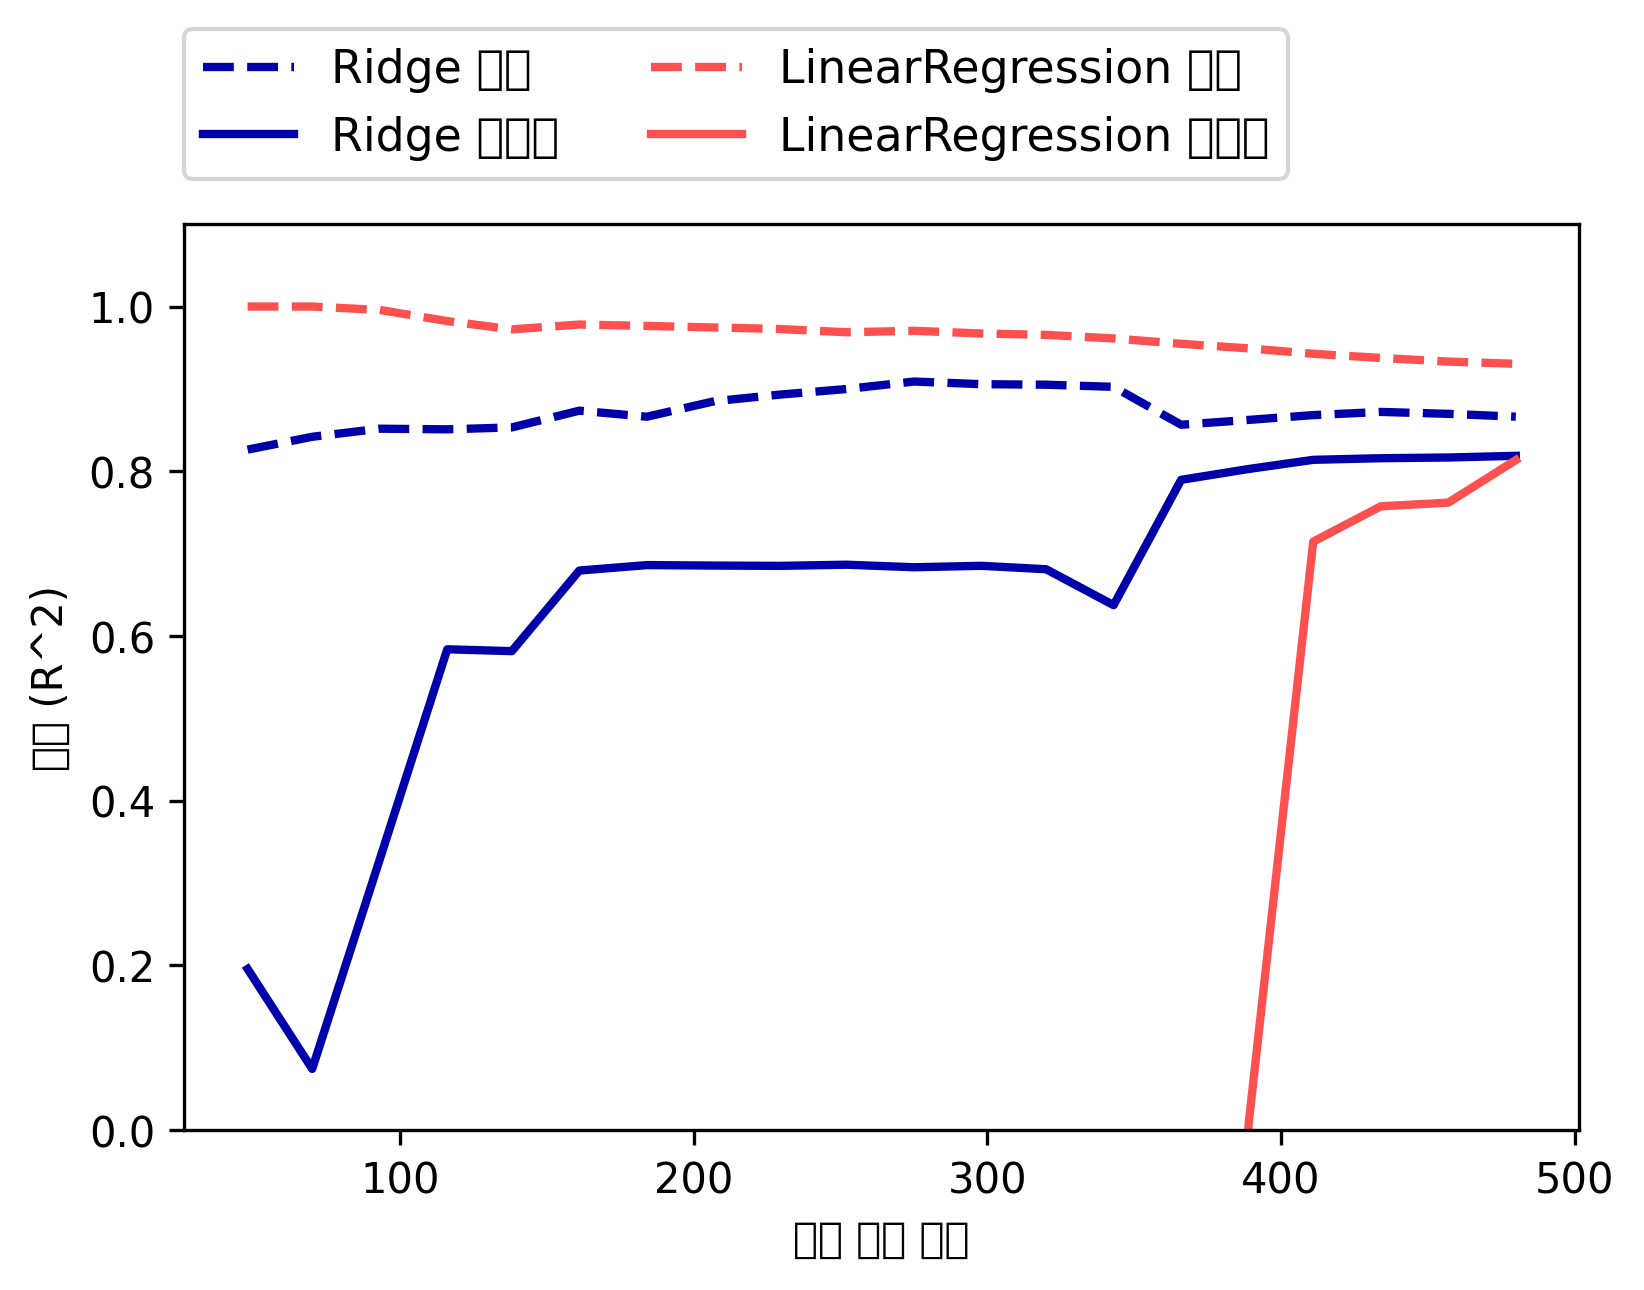

In [35]:
mglearn.plots.plot_ridge_n_samples()

#### Lasso

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [37]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

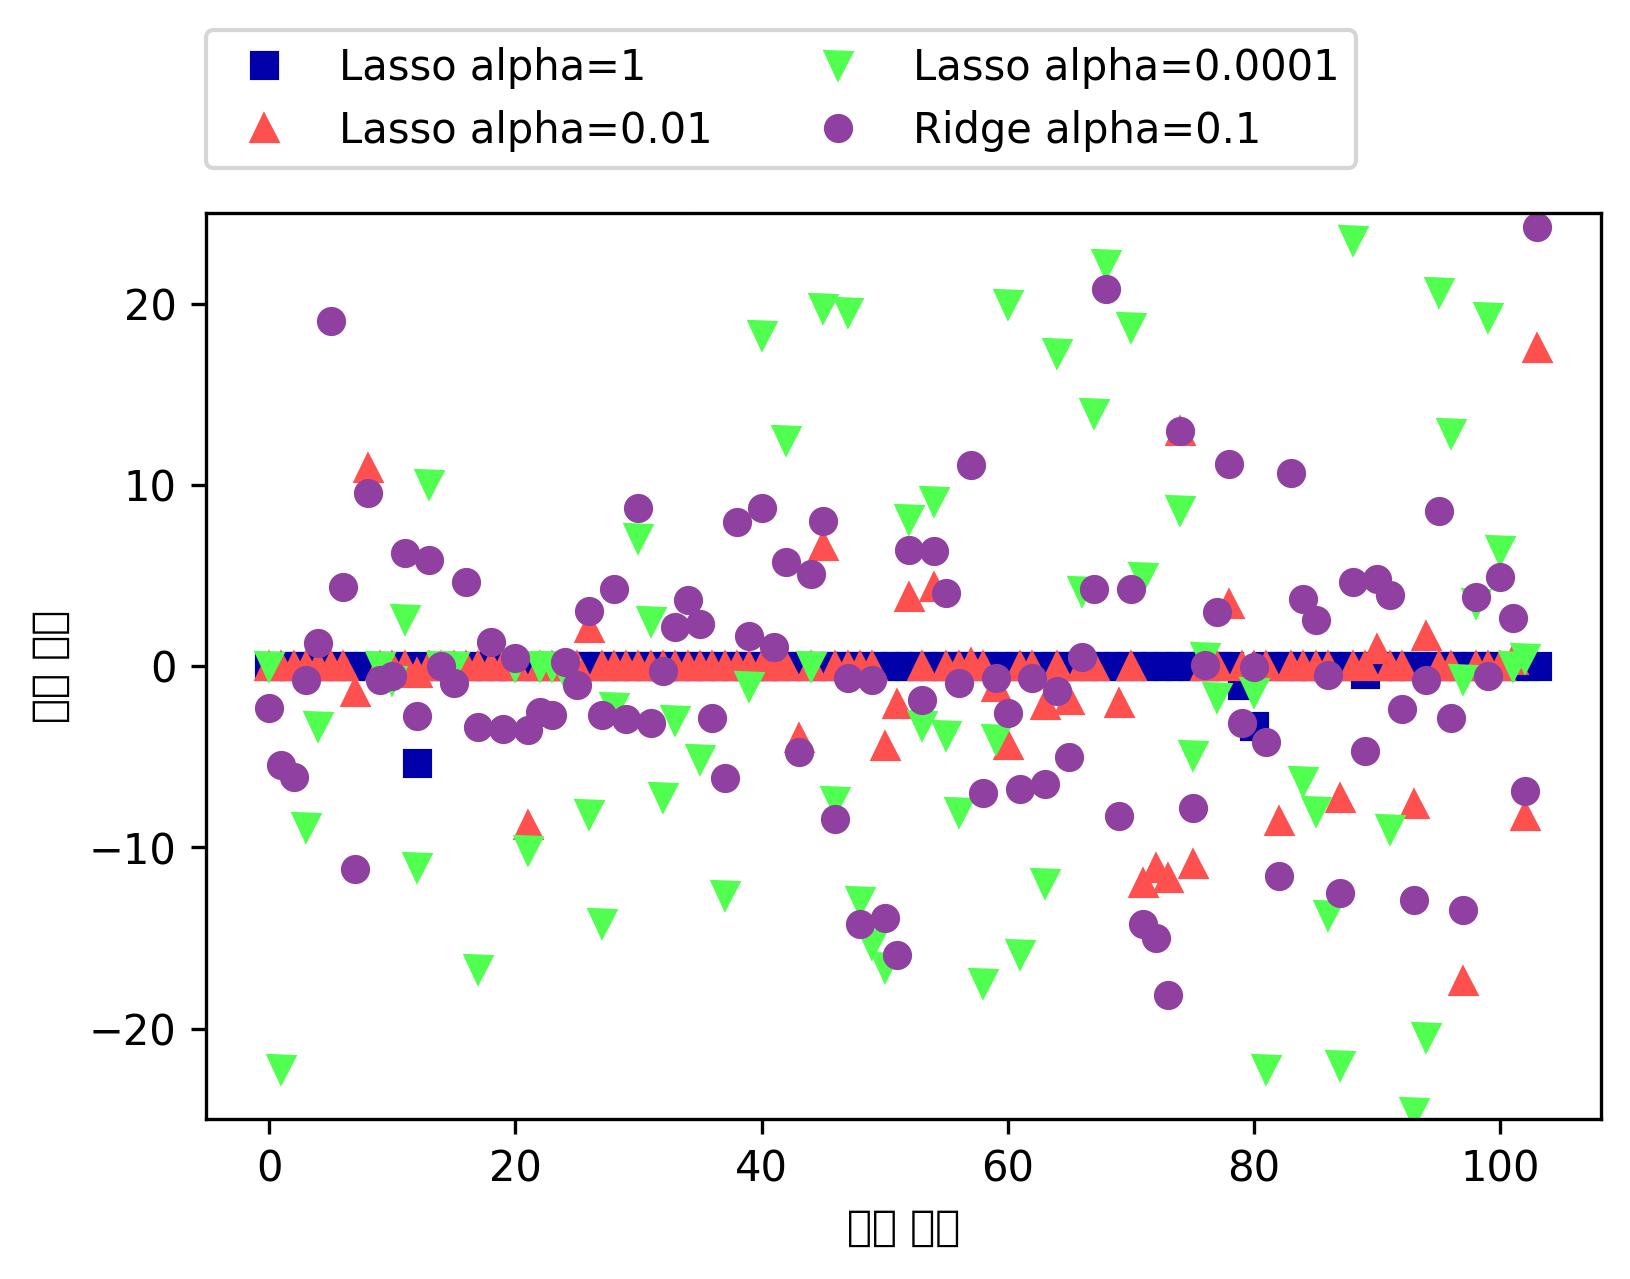

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음

#### 분류에 대한 선형 모델

사이킷런 0.19 버전 이하에서는 `LinearSVC`와 `liblinear`를 사용하는 `LogisticRegression`의 `verbose` 매개변수가 0이 아니고 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고 메세지가 나옵니다. 사이킷런 0.20 버전부터는 `verbose` 매개변수에 상관없이 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수 증가 경고가 나옵니다.

향후 사이킷런 0.22 버전에서 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `liblinear`에서 `lbfgs`로 변경되었습니다.

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:109: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:109: Ru

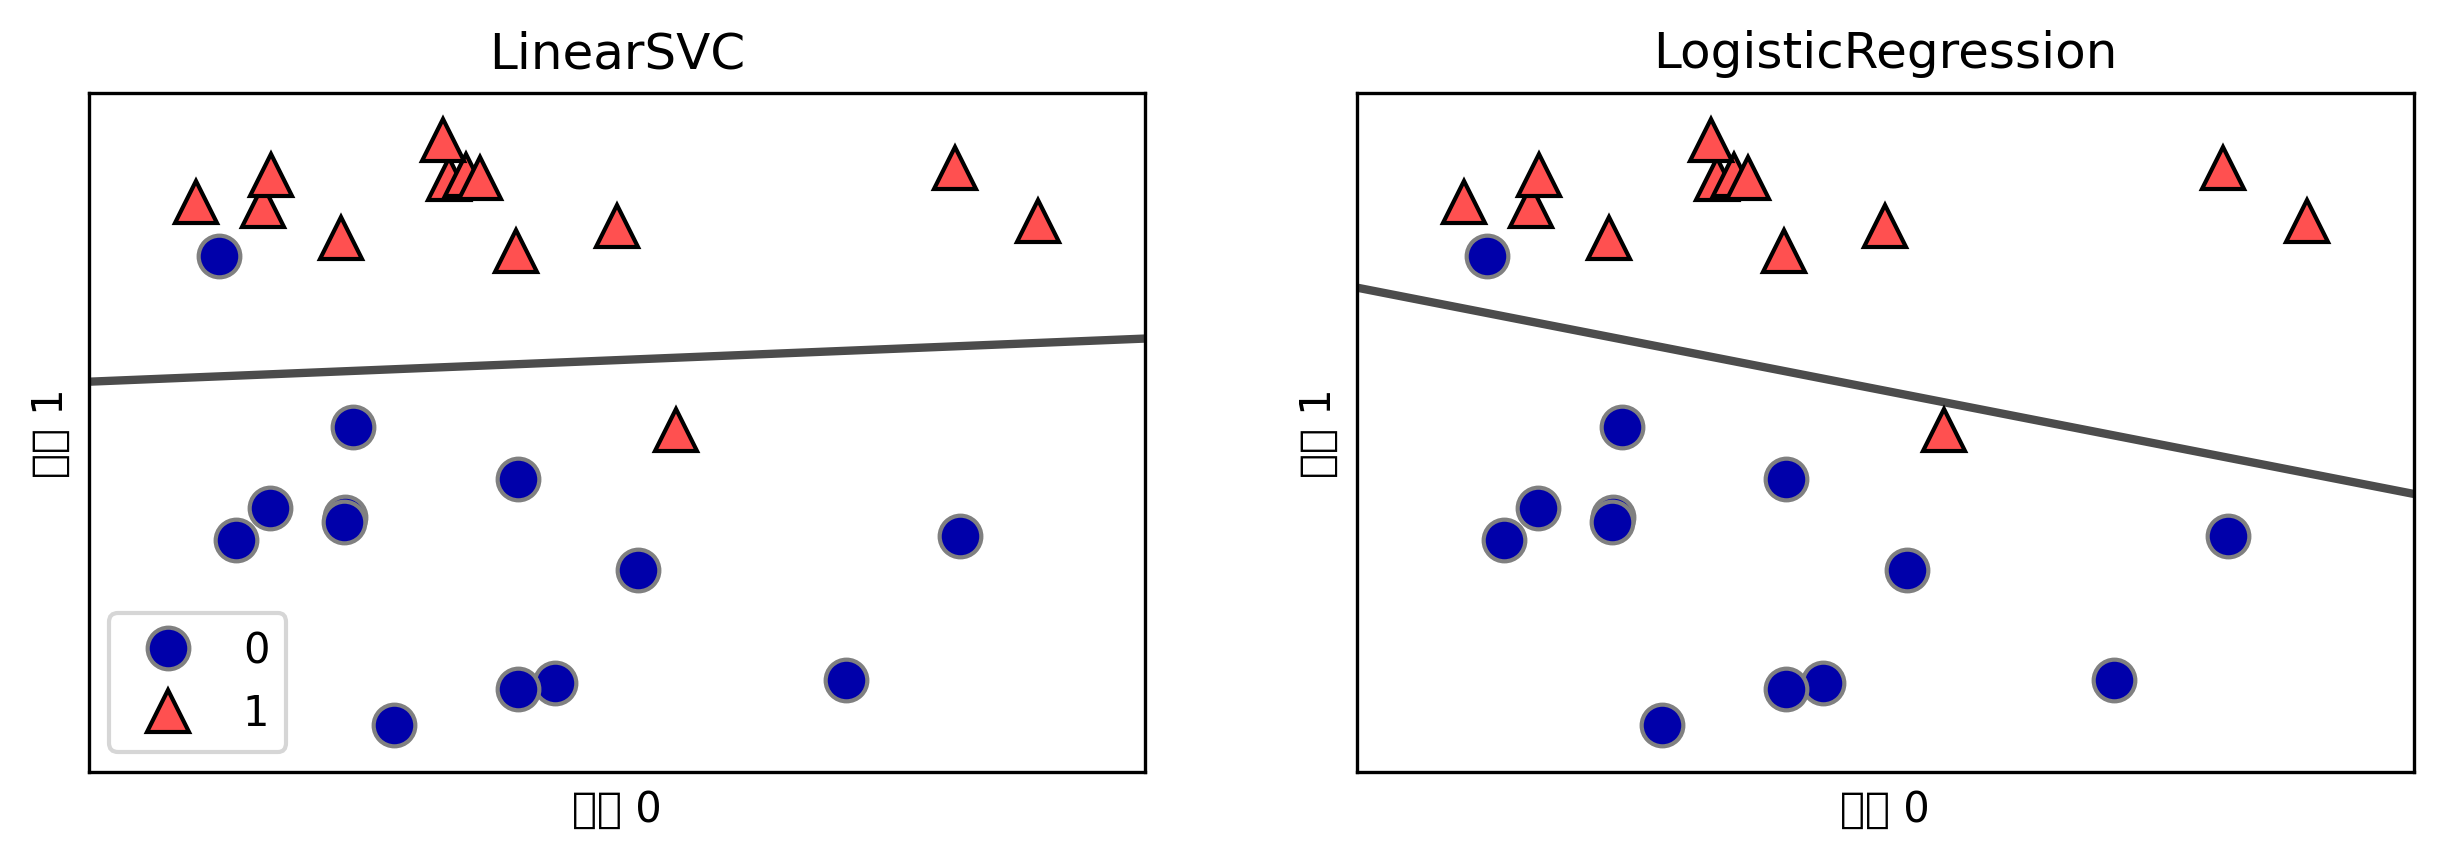

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() # 책에는 없음

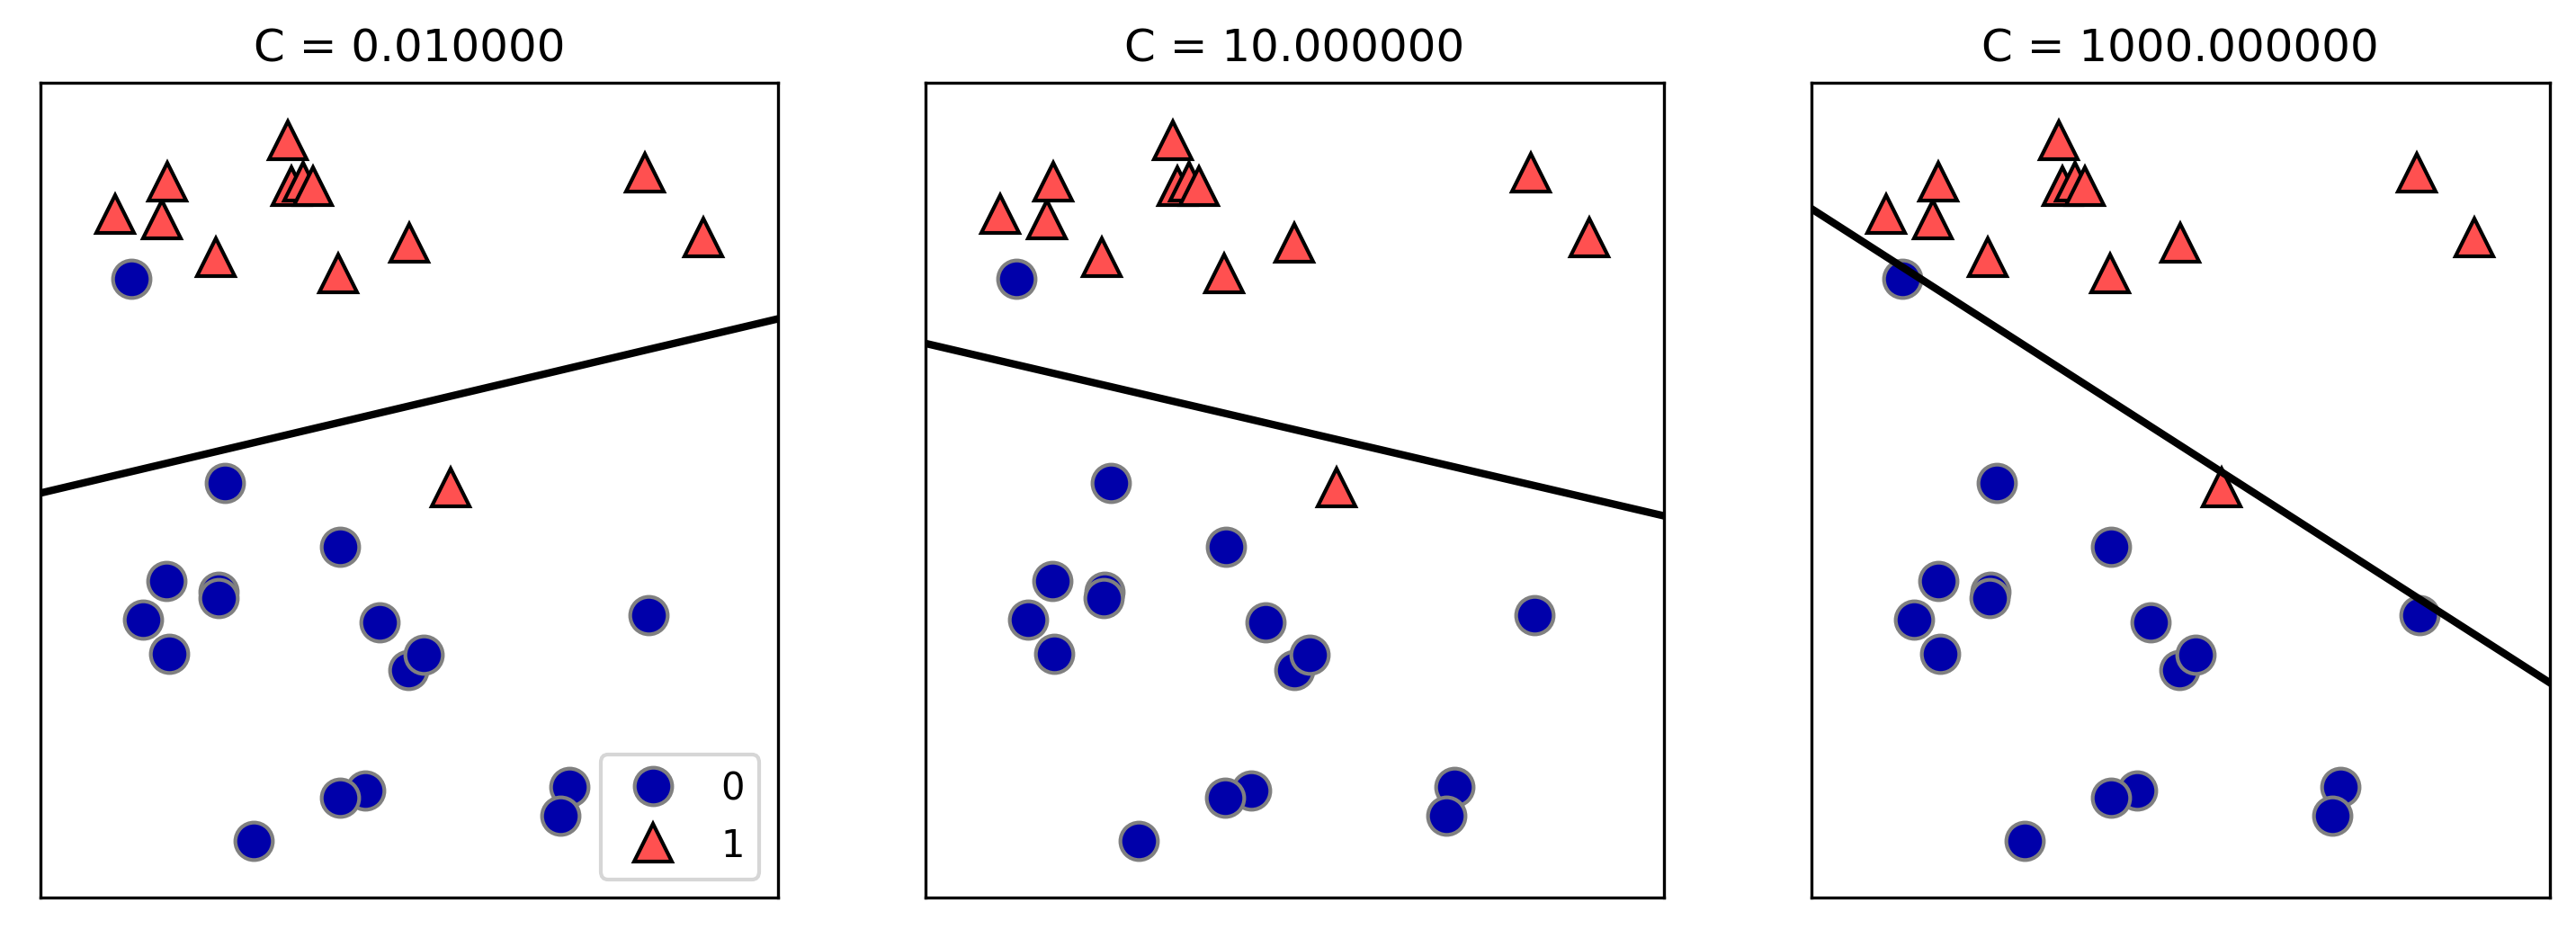

In [41]:
mglearn.plots.plot_linear_svc_regularization()

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


In [43]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.972


In [44]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

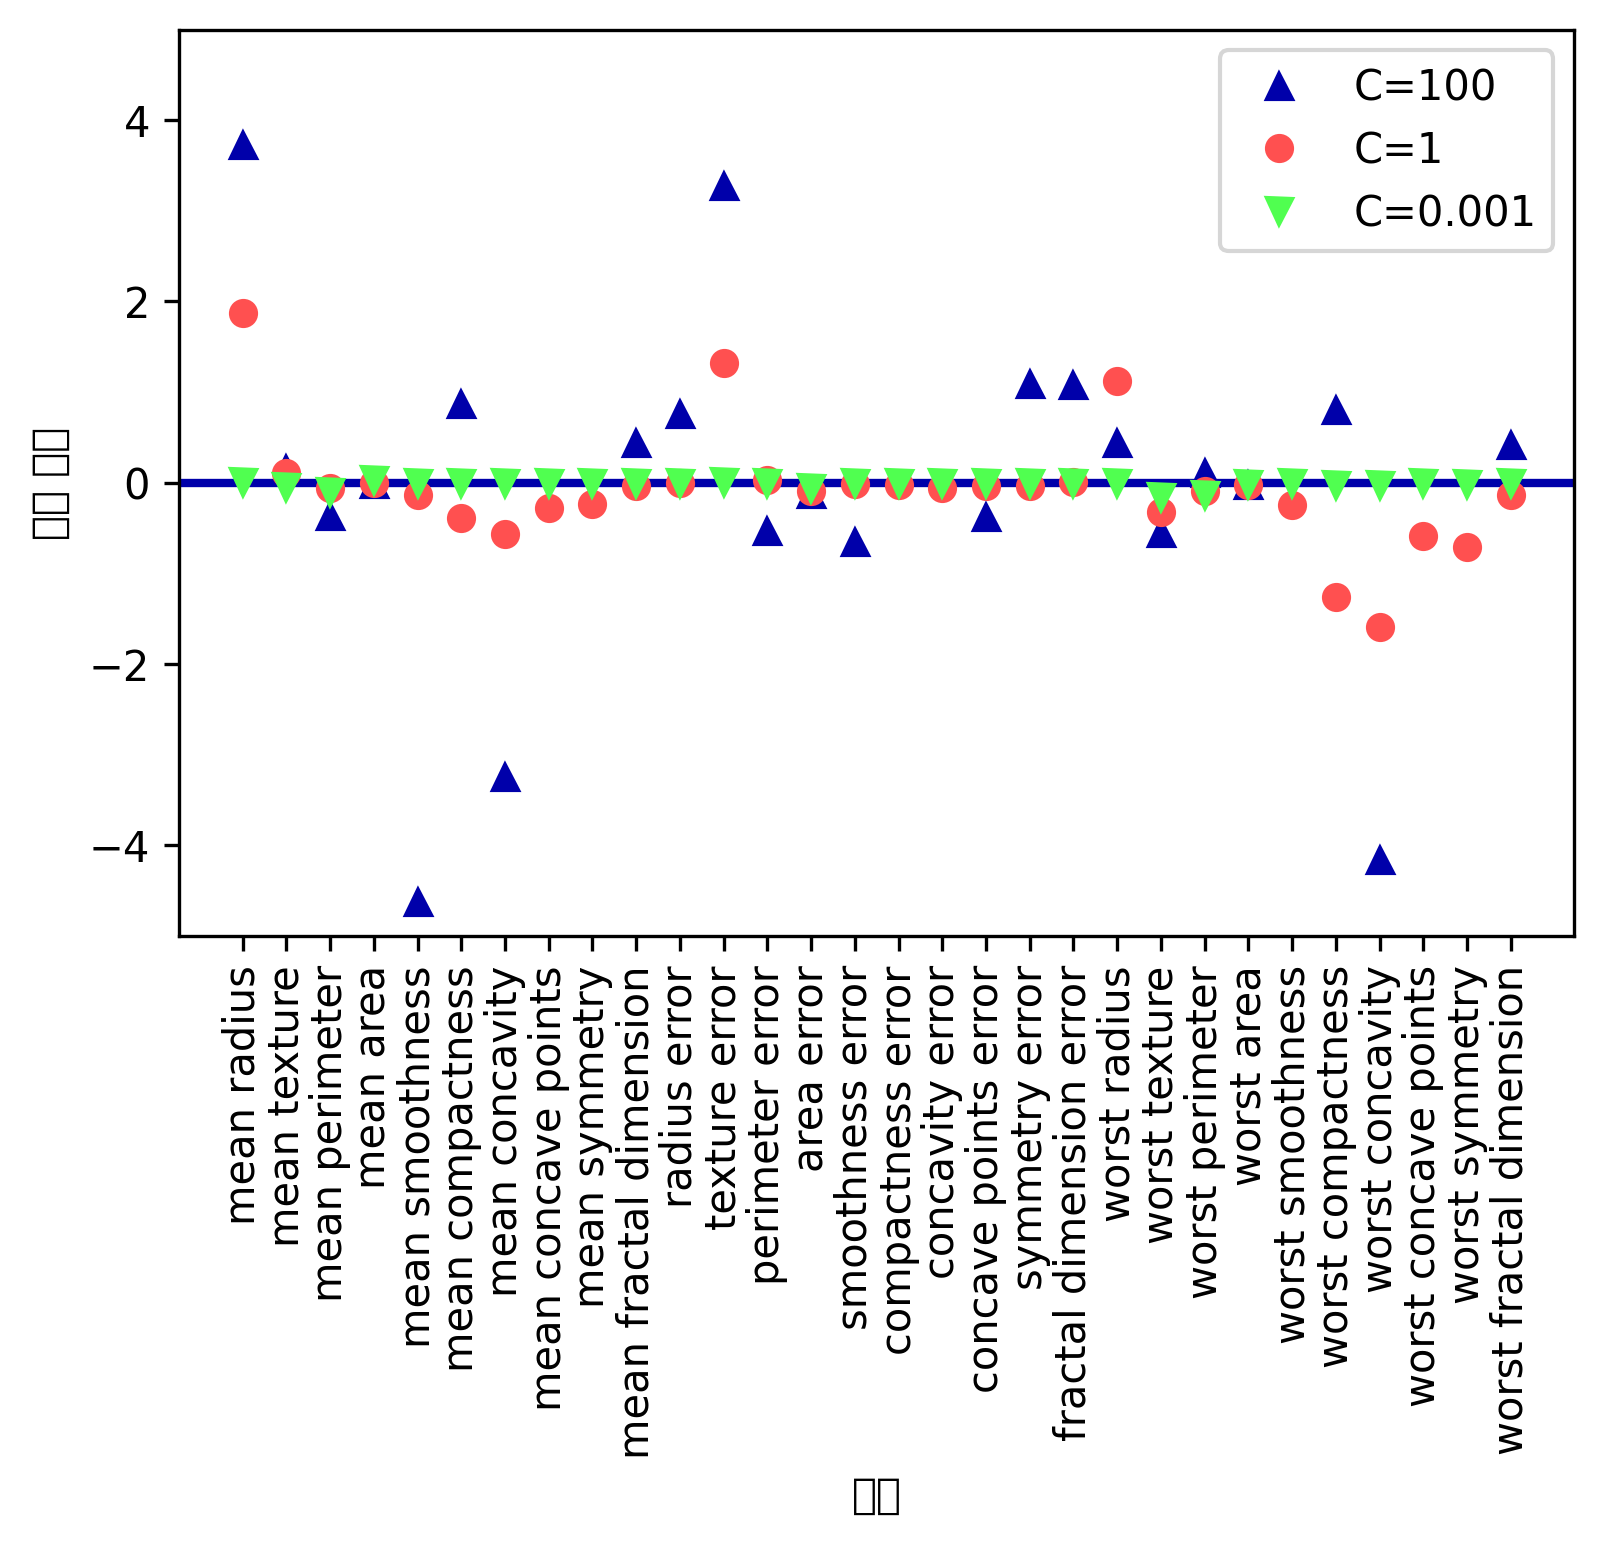

In [45]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show() # 책에는 없음

사이킷런 0.20 버전부터는 `LogisticRegression`의 알고리즘이 수렴에 도달하지 못하면 `max_iter` 매개변수를 증가시키라는 경고 메세지가 출력됩니다. `LogisticRegression`의 `max_iter` 매개변수 기본값은 100입니다.

사이킷런 0.22 버전부터는 `LogisticRegression`의 `solver` 매개변수 기본값이 `lbfgs`로 변경되었습니다. `lbfgs`는 L1 규제를 지원하지 않습니다. 따라서 `solver` 매개변수를 `liblinear`로 지정합니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

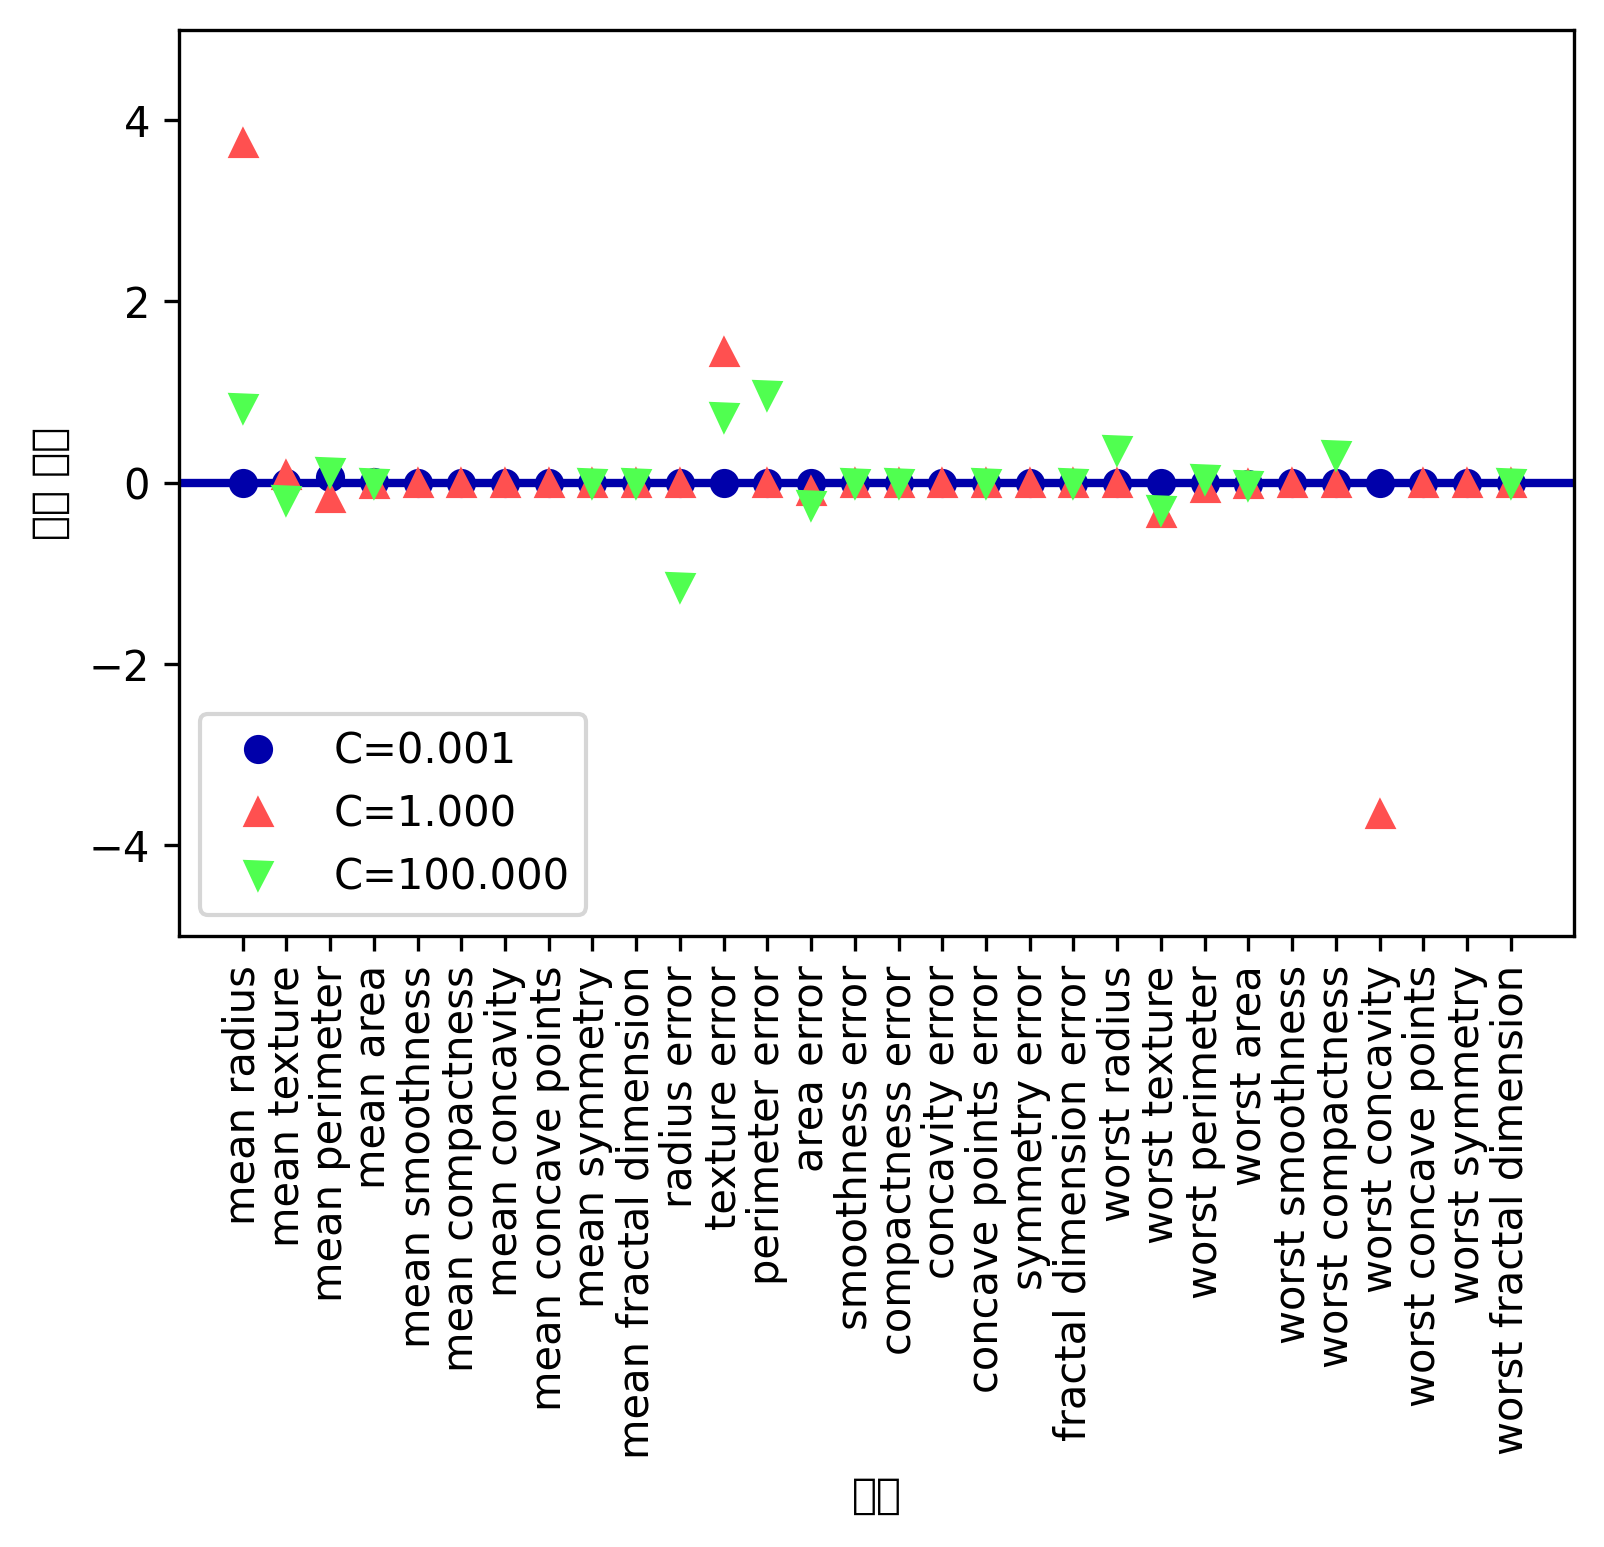

In [46]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

#### 다중 클래스 분류를 위한 선형 모델

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53

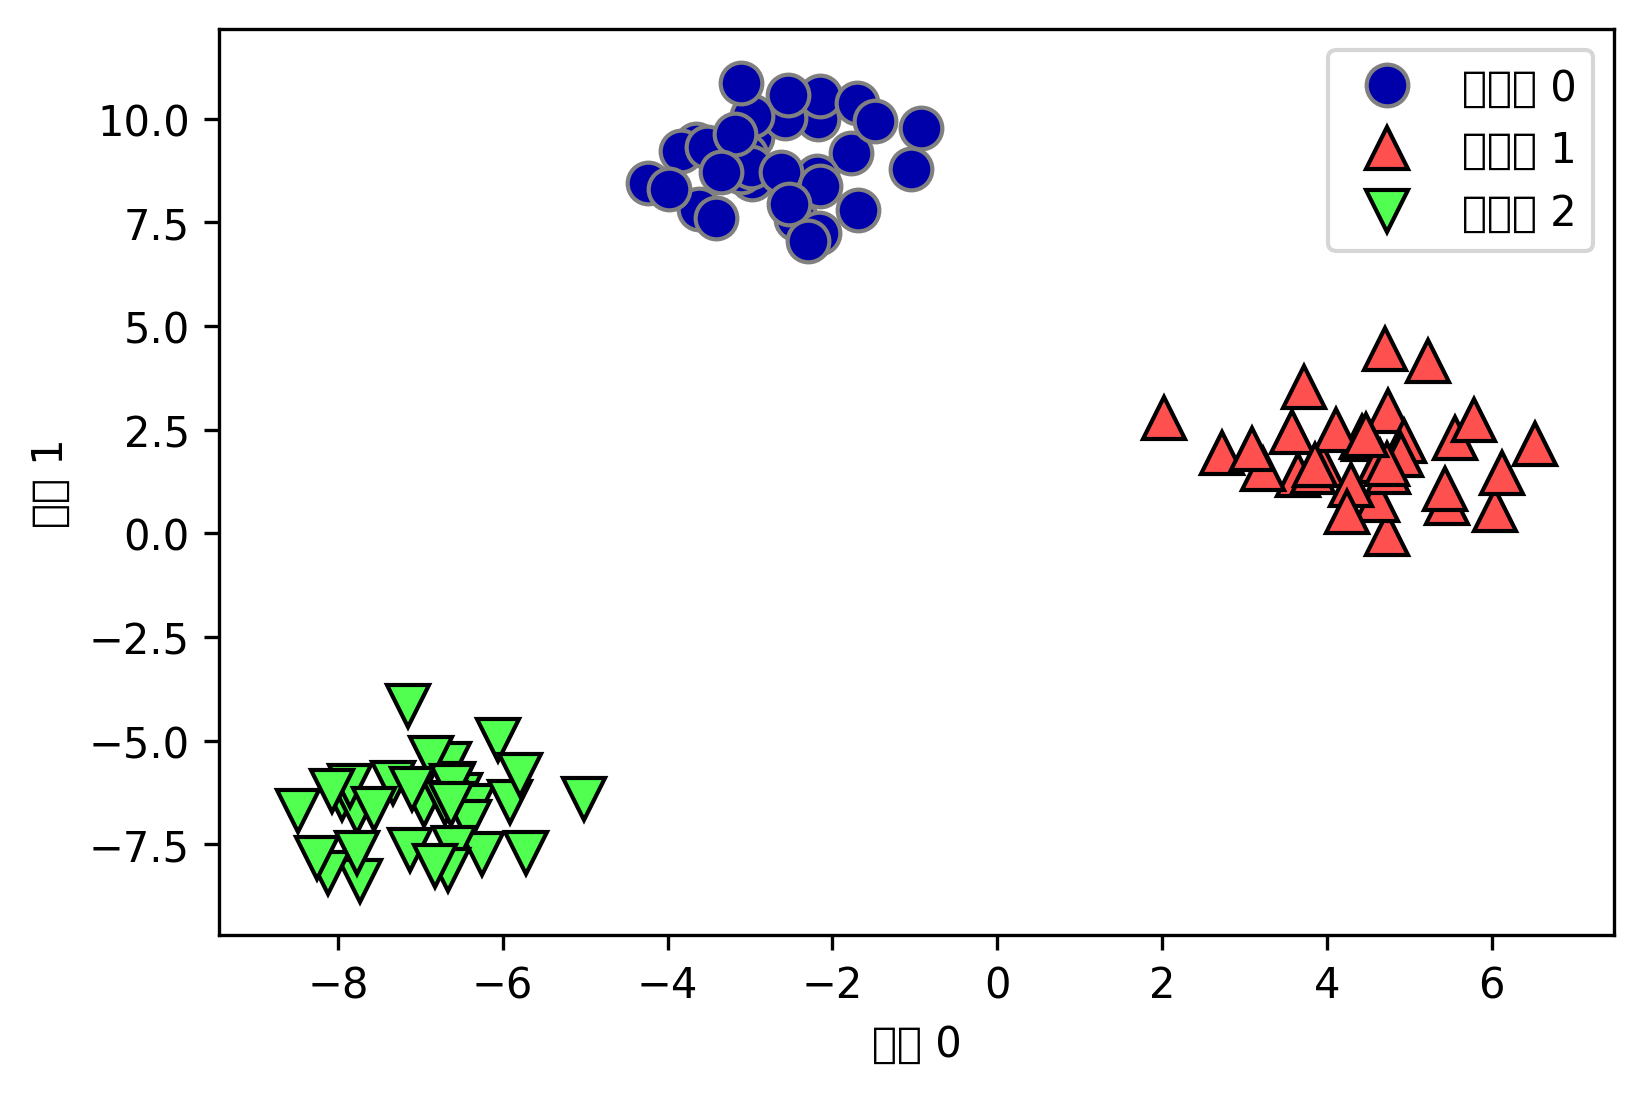

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show() # 책에는 없음

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

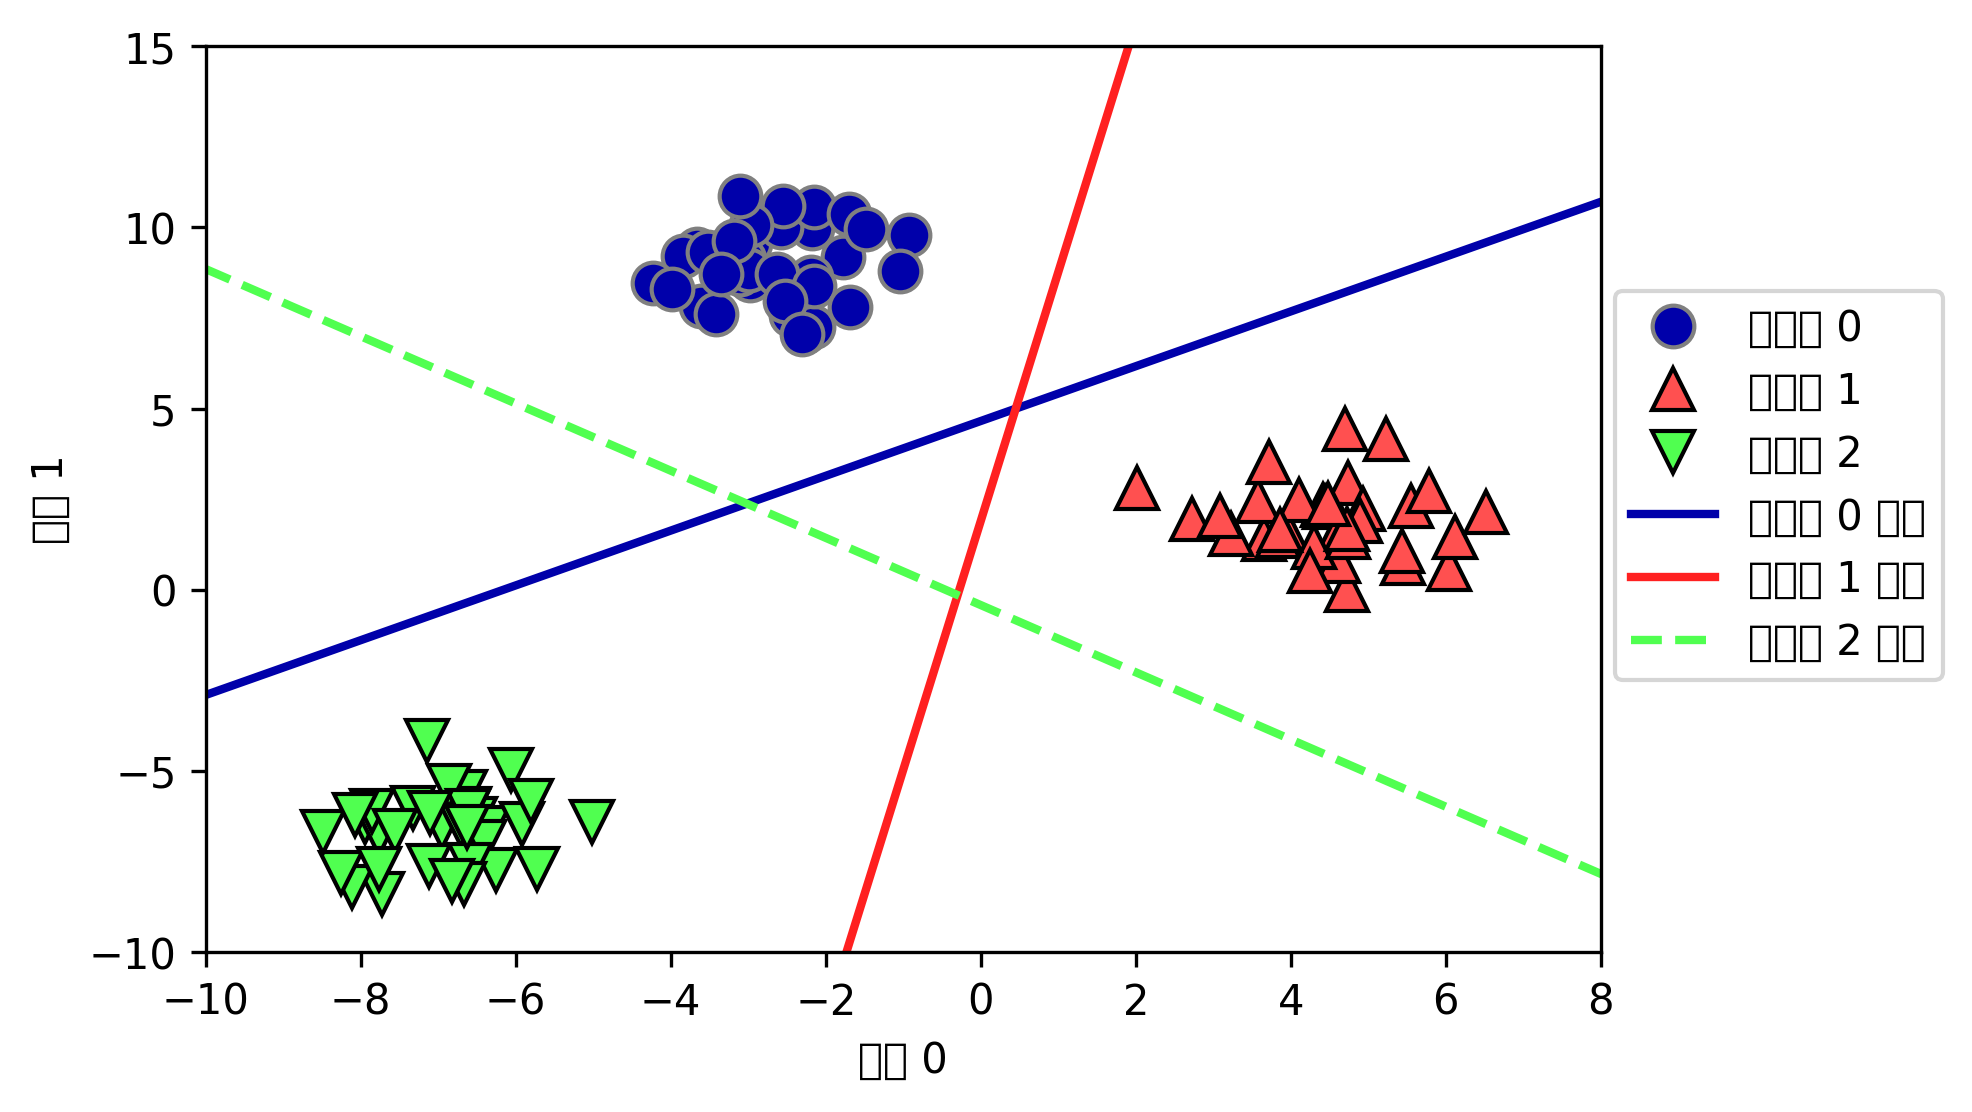

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44

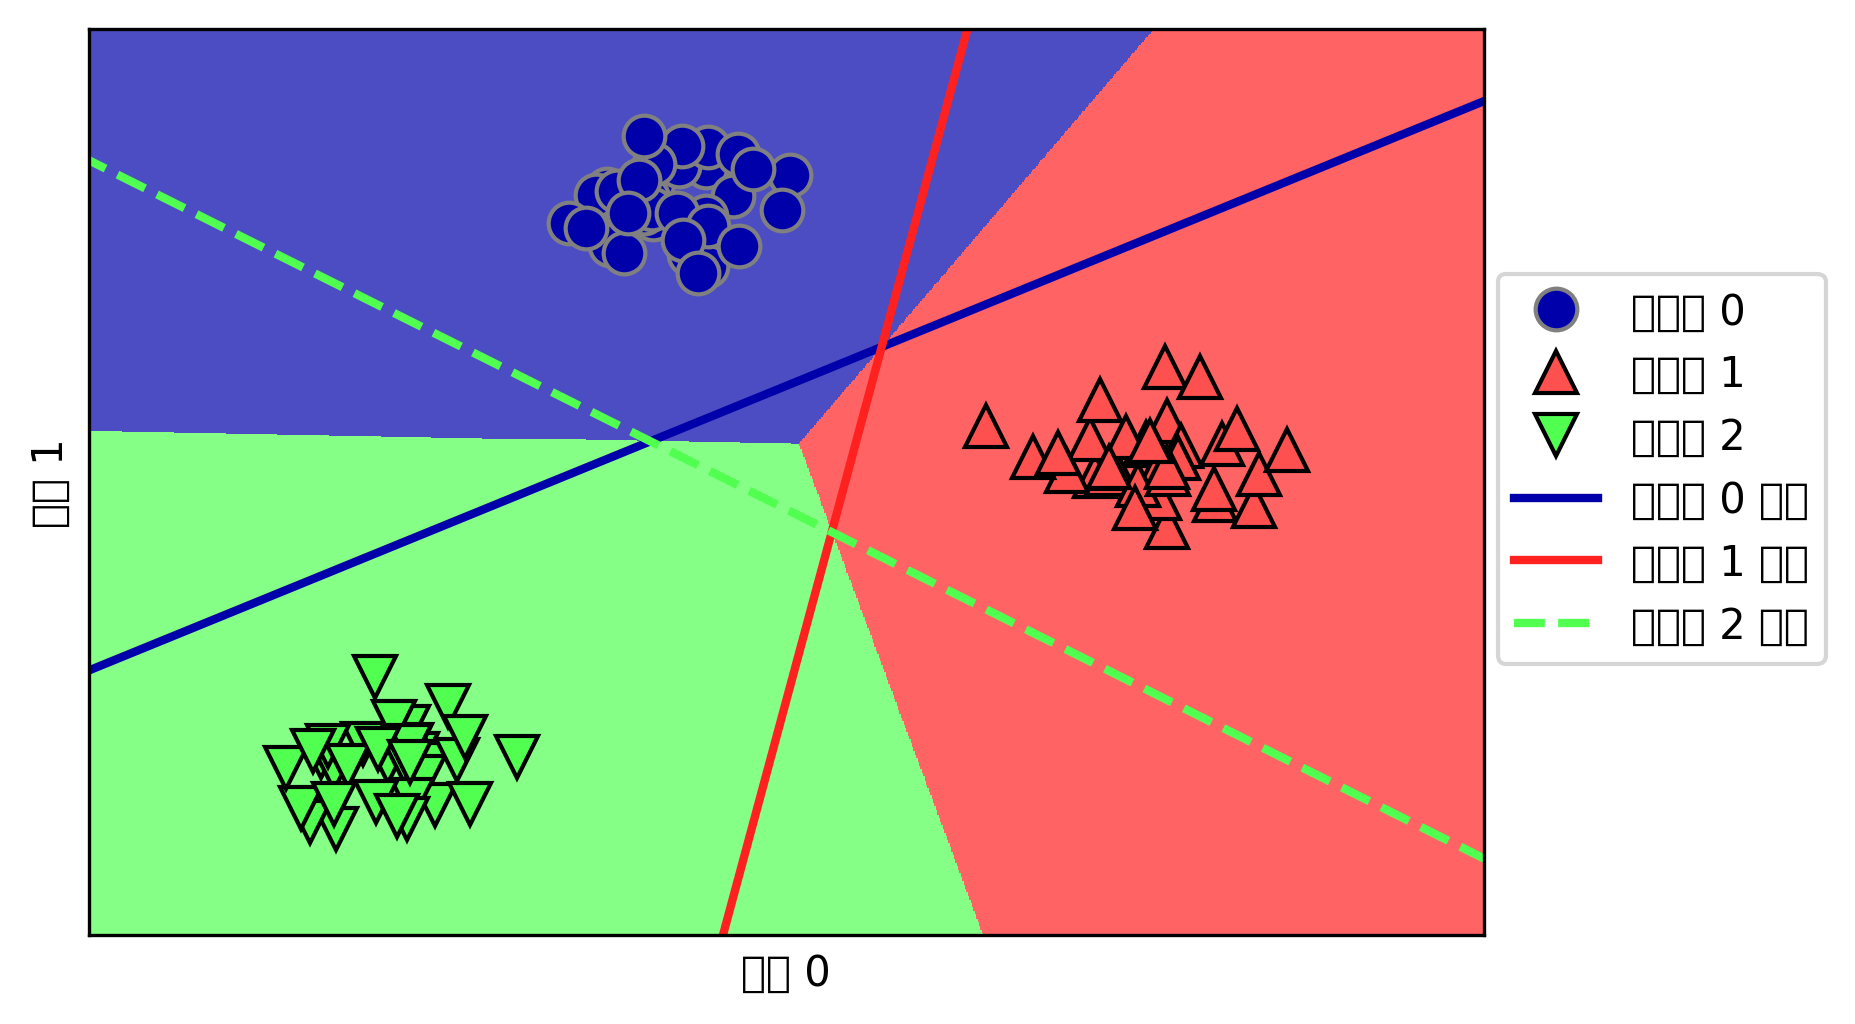

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 장단점과 매개변수

In [51]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [52]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [53]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

### 나이브 베이즈 분류기

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 결정 트리

In [56]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

#### 결정 트리 만들기

In [ ]:
mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#### 결정 트리 분석

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=["악성", "양성"], feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

#### 트리의 특성 중요도

In [ ]:
print("특성 중요도:\n", tree.feature_importances_)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() # 책에는 없음

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show() # 책에는 없음

#### 장단점과 매개변수

### 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show() # 책에는 없음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 장단점과 매개변수

### 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [ ]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

In [ ]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 커널 기법
#### SVM 이해하기
\begin{align*}
\end{align*}

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### SVM 매개변수 튜닝

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))
plt.show() # 책에는 없음

사이킷런 0.20 버전에서 `SVC` 클래스의 `gamma` 매개변수 옵션에 `auto`외에 `scale`이 추가되었습니다. `auto`는 `1/n_features`, 즉 특성 개수의 역수입니다. `scale`은 `1/(n_features * X.std())`로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 `gamma` 매개변수의 기본값이 `auto`에서 `scale`로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 `scale`과 `auto`는 차이가 없습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

#### SVM 을 위한 데이터 전처리

In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

In [ ]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

#### 장단점과 매개변수

### 신경망 (딥러닝)
#### 신경망 모델

In [ ]:
mglearn.plots.plot_logistic_regression_graph()

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph()

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show() # 책에는 없음

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 신경망 튜닝

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], 
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [ ]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=500)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [ ]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

In [ ]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show() # 책에는 없음

#### 장단점과 매개변수
##### 신경망의 복잡도 추정

### 분류 예측의 불확실성 추정

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

#### 결정 함수

In [ ]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

In [ ]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

In [ ]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

In [ ]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

#### 예측 확률

In [ ]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

![](images/plot_classifier_comparison.png)

#### 다중 분류에서의 불확실성

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

In [ ]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

In [ ]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다.

In [ ]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

### 요약 및 정리